In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import statistics as st
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy.stats import skew

In [2]:
sales=pd.read_excel('DS1_C4_S9_Car_Data.xlsx')
sales

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,24.0,Petrol,1652.0,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,15.0,CNG,1652.0,...,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,24.0,Petrol,1652.0,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1545 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes
1272,1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1550 kg,"Drive side airbag, Curtain airbags, Driver fro...",Yes,Yes
1273,1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1482 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes
1274,1274,Honda,City,V Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1455 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes


In [3]:
# Data Preprocessing
sales.isnull().sum()

S. No.                               0
Make                                75
Model                                0
Variant                              0
Displacement                        12
Cylinders                           66
Valves_Per_Cylinder                102
Fuel_Tank_Capacity_litre            69
Fuel_Type                            0
Height_mm                            1
Length_mm                            0
Width_mm                            12
Body_Type                            6
Doors                                4
City_Mileage_km_litre              555
Highway_Mileage_km_litre           800
Kerb_Weight                        365
Power                                0
Torque                               2
Seating_Capacity                     6
Central_Locking                    149
Child_Safety_Locks                  75
Hill_Assist                        796
Drive_Modes                       1081
High_Speed_Alert_System           1068
ABS_(Anti-lock_Braking_Sy

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   S. No.                          1276 non-null   int64  
 1   Make                            1201 non-null   object 
 2   Model                           1276 non-null   object 
 3   Variant                         1276 non-null   object 
 4   Displacement                    1264 non-null   float64
 5   Cylinders                       1210 non-null   float64
 6   Valves_Per_Cylinder             1174 non-null   float64
 7   Fuel_Tank_Capacity_litre        1207 non-null   float64
 8   Fuel_Type                       1276 non-null   object 
 9   Height_mm                       1275 non-null   float64
 10  Length_mm                       1276 non-null   float64
 11  Width_mm                        1264 non-null   float64
 12  Body_Type                       12

In [5]:
sales['Make']=sales['Make'].fillna("Not Available")
sales['Displacement']=sales['Displacement'].fillna(sales['Displacement'].median())
sales['Cylinders']=sales['Cylinders'].fillna(sales['Cylinders'].median())
sales['Valves_Per_Cylinder']=sales['Valves_Per_Cylinder'].fillna(sales['Valves_Per_Cylinder'].median())
sales['Fuel_Tank_Capacity_litre']=sales['Fuel_Tank_Capacity_litre'].fillna(sales['Fuel_Tank_Capacity_litre'].median())
sales['Height_mm']=sales['Height_mm'].fillna(sales['Height_mm'].median())
sales['Width_mm']=sales['Width_mm'].fillna(sales['Width_mm'].median())
sales['Body_Type']=sales['Body_Type'].fillna("Not Available")
sales['Doors']=sales['Doors'].fillna(sales['Doors'].median())
sales['City_Mileage_km_litre']=sales['City_Mileage_km_litre'].fillna(sales['City_Mileage_km_litre'].median())
sales['Highway_Mileage_km_litre']=sales['Highway_Mileage_km_litre'].fillna(sales['Highway_Mileage_km_litre'].median())
# sales['Kerb_Weight']=sales['Kerb_Weight'].fillna(sales['Kerb_Weight'].median())
sales['Torque']=sales['Torque'].fillna(sales['Torque'].median())
sales['Seating_Capacity']=sales['Seating_Capacity'].fillna(sales['Seating_Capacity'].median())
sales['Central_Locking']=sales['Central_Locking'].fillna("Not Available")
sales['Child_Safety_Locks']=sales['Child_Safety_Locks'].fillna("Not Available")
sales['High_Speed_Alert_System']=sales['High_Speed_Alert_System'].fillna("Not Available")
sales['ABS_(Anti-lock_Braking_System)']=sales['ABS_(Anti-lock_Braking_System)'].fillna("Not Available")
# sales['Gross_Vehicle_Weight']=sales['Gross_Vehicle_Weight'].fillna(sales['Gross_Vehicle_Weight'].median())
sales['Airbags']=sales['Airbags'].fillna("Not Available")
sales['Door_Ajar_Warning']=sales['Door_Ajar_Warning'].fillna("Not Available")
sales['Fasten_Seat_Belt_Warning']=sales['Fasten_Seat_Belt_Warning'].fillna("Not Available")
sales['Drive_Modes']=sales['Drive_Modes'].fillna("Not Available")
sales['Hill_Assist']=sales['Hill_Assist'].fillna("Not Available") 

In [6]:
sales.isnull().sum()

S. No.                              0
Make                                0
Model                               0
Variant                             0
Displacement                        0
Cylinders                           0
Valves_Per_Cylinder                 0
Fuel_Tank_Capacity_litre            0
Fuel_Type                           0
Height_mm                           0
Length_mm                           0
Width_mm                            0
Body_Type                           0
Doors                               0
City_Mileage_km_litre               0
Highway_Mileage_km_litre            0
Kerb_Weight                       365
Power                               0
Torque                              0
Seating_Capacity                    0
Central_Locking                     0
Child_Safety_Locks                  0
Hill_Assist                         0
Drive_Modes                         0
High_Speed_Alert_System             0
ABS_(Anti-lock_Braking_System)      0
Gross_Vehicl

In [7]:
SALES=sales.loc[:,sales.columns!="S. No."]
SALES

,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,Length_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
0,Tata,Nano Genx,Xt,624.0,2.0,2.0,24.0,Petrol,1652.0,3164.0,...,Yes,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available
1,Tata,Nano Genx,Xe,624.0,2.0,2.0,24.0,Petrol,1652.0,3164.0,...,Not Available,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available
2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,15.0,CNG,1652.0,3164.0,...,Not Available,Yes,Yes,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available
3,Tata,Nano Genx,Xta,624.0,2.0,2.0,24.0,Petrol,1652.0,3164.0,...,Yes,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available
4,Tata,Nano Genx,Xm,624.0,2.0,2.0,24.0,Petrol,1652.0,3164.0,...,Not Available,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,4440.0,...,Yes,Yes,Not Available,Not Available,Yes,Yes,1545 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes
1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,4440.0,...,Yes,Yes,Not Available,Not Available,Yes,Yes,1550 kg,"Drive side airbag, Curtain airbags, Driver fro...",Yes,Yes
1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,4440.0,...,Yes,Yes,Not Available,Not Available,Yes,Yes,1482 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes
1274,Honda,City,V Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,4440.0,...,Yes,Yes,Not Available,Not Available,Yes,Yes,1455 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes


In [8]:
SALES[SALES.duplicated(keep='first')]

,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,Length_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
675,Mahindra,Xuv500,G At,2179.0,4.0,4.0,70.0,Petrol,1785.0,4585.0,...,Yes,Yes,Yes,Not Available,Not Available,Yes,2510 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes
676,Mahindra,Xuv500,W7,2179.0,4.0,4.0,70.0,Diesel,1785.0,4585.0,...,Not Available,Yes,Not Available,Not Available,Not Available,Not Available,2450 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes
677,Mahindra,Xuv500,W7 At,2179.0,4.0,4.0,70.0,Diesel,1785.0,4585.0,...,Yes,Yes,Yes,Not Available,Not Available,Yes,2510 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes
678,Mahindra,Xuv500,W9,2179.0,4.0,4.0,70.0,Diesel,1785.0,4585.0,...,Yes,Yes,Yes,Not Available,Not Available,Yes,2510 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes
679,Mahindra,Xuv500,W9 At,2179.0,4.0,4.0,70.0,Diesel,1785.0,4585.0,...,Yes,Yes,Yes,Not Available,Not Available,Yes,2510 kg,"Driver frontal airbag, Drive side airbag",Yes,Yes
680,Mahindra,Xuv500,W11,2179.0,4.0,4.0,70.0,Diesel,1785.0,4585.0,...,Yes,Yes,Yes,Not Available,Not Available,Yes,2510 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes
681,Mahindra,Xuv500,W11 At,2179.0,4.0,4.0,70.0,Diesel,1785.0,4585.0,...,Yes,Yes,Yes,Not Available,Not Available,Yes,2510 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes
682,Mahindra,Xuv500,W11 (O),2179.0,4.0,4.0,70.0,Diesel,1785.0,4585.0,...,Yes,Yes,Yes,Not Available,Not Available,Yes,2510 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes
683,Mahindra,Xuv500,W11 (O) At,2179.0,4.0,4.0,70.0,Diesel,1785.0,4585.0,...,Yes,Yes,Yes,Not Available,Not Available,Yes,2510 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes


In [9]:
SALES.drop_duplicates()

,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,Length_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
0,Tata,Nano Genx,Xt,624.0,2.0,2.0,24.0,Petrol,1652.0,3164.0,...,Yes,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available
1,Tata,Nano Genx,Xe,624.0,2.0,2.0,24.0,Petrol,1652.0,3164.0,...,Not Available,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available
2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,15.0,CNG,1652.0,3164.0,...,Not Available,Yes,Yes,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available
3,Tata,Nano Genx,Xta,624.0,2.0,2.0,24.0,Petrol,1652.0,3164.0,...,Yes,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available
4,Tata,Nano Genx,Xm,624.0,2.0,2.0,24.0,Petrol,1652.0,3164.0,...,Not Available,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,4440.0,...,Yes,Yes,Not Available,Not Available,Yes,Yes,1545 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes
1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,4440.0,...,Yes,Yes,Not Available,Not Available,Yes,Yes,1550 kg,"Drive side airbag, Curtain airbags, Driver fro...",Yes,Yes
1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,4440.0,...,Yes,Yes,Not Available,Not Available,Yes,Yes,1482 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes
1274,Honda,City,V Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,4440.0,...,Yes,Yes,Not Available,Not Available,Yes,Yes,1455 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes


In [10]:
SALES.isnull().sum()

Make                                0
Model                               0
Variant                             0
Displacement                        0
Cylinders                           0
Valves_Per_Cylinder                 0
Fuel_Tank_Capacity_litre            0
Fuel_Type                           0
Height_mm                           0
Length_mm                           0
Width_mm                            0
Body_Type                           0
Doors                               0
City_Mileage_km_litre               0
Highway_Mileage_km_litre            0
Kerb_Weight                       365
Power                               0
Torque                              0
Seating_Capacity                    0
Central_Locking                     0
Child_Safety_Locks                  0
Hill_Assist                         0
Drive_Modes                         0
High_Speed_Alert_System             0
ABS_(Anti-lock_Braking_System)      0
Gross_Vehicle_Weight              595
Airbags     

In [11]:
# Task 1 :Top 5 Most prefeered body car type
Bodytype=SALES.loc[:,["Body_Type"]]
Count=Bodytype.groupby(by="Body_Type")["Body_Type"].count()
Count

Body_Type
Convertible             20
Coupe                   41
Coupe, Convertible       1
Crossover               18
Crossover, SUV           2
Hatchback              316
MPV                     39
MUV                     39
Not Available            6
Pick-up                  3
SUV                    447
SUV, Crossover           2
Sedan                  333
Sedan, Coupe             2
Sedan, Crossover         1
Sports                   3
Sports, Convertible      2
Sports, Hatchback        1
Name: Body_Type, dtype: int64

In [12]:
Count=Count.rename("Body_Type_count").reset_index()

In [13]:
Count

,Body_Type,Body_Type_count
0,Convertible,20
1,Coupe,41
2,"Coupe, Convertible",1
3,Crossover,18
4,"Crossover, SUV",2
5,Hatchback,316
6,MPV,39
7,MUV,39
8,Not Available,6
9,Pick-up,3


In [14]:
sorted_count=Count.sort_values("Body_Type_count",ascending=False)
sorted_count

,Body_Type,Body_Type_count
10,SUV,447
12,Sedan,333
5,Hatchback,316
1,Coupe,41
6,MPV,39
7,MUV,39
0,Convertible,20
3,Crossover,18
8,Not Available,6
15,Sports,3


In [15]:
Top5=sorted_count.head()
Top5

,Body_Type,Body_Type_count
10,SUV,447
12,Sedan,333
5,Hatchback,316
1,Coupe,41
6,MPV,39


Text(0, 0.5, 'Body Type Name')

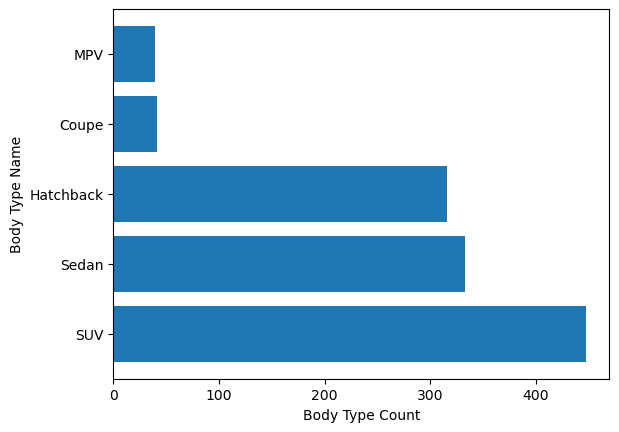

In [16]:
# Task 1
plt.barh(Top5["Body_Type"],Top5["Body_Type_count"])
plt.xlabel("Body Type Count")
plt.ylabel("Body Type Name")

Interpretation
This code is designed to find the top 5 most frequent body types within the dataset and visualize them in a horizontal bar chart. The plot would provide an easily interpretable visual representation, highlighting which body types are most prevalent. The body types with the highest bars are the most common, giving insights into the distribution of body types within the dataset.

In [18]:
# Task 2 cars with along Drive Modes
cars=SALES.groupby(by="Make")["Drive_Modes"].count().reset_index()

In [19]:
cars.sort_values("Drive_Modes",ascending=False)

,Make,Drive_Modes
24,Maruti Suzuki,149
13,Hyundai,130
23,Mahindra,119
36,Tata,100
37,Toyota,82
31,Not Available,75
12,Honda,64
35,Skoda,43
11,Ford,43
4,Bmw,37


In [20]:
# Task 2 Normal comfort eco sport and power mode
dc=SALES[SALES['Drive_Modes']=='Normal, Comfort, Eco, Sport, Power Mode']
print(dc)
# print("------------------------")
print("Total no of manufacture cars has all these driving mode is ",len(dc))

     Make Model                    Variant  Displacement  Cylinders  \
321  Audi    Q8  55 Tfsi Quattro Tiptronic        2995.0        4.0   
330  Audi  A8 L            55 Tfsi Quattro        2995.0        8.0   

     Valves_Per_Cylinder  Fuel_Tank_Capacity_litre Fuel_Type  Height_mm  \
321                  4.0                      85.0    Petrol     1740.0   
330                  4.0                      82.0    Petrol     1485.0   

     Length_mm  ...  Central_Locking Child_Safety_Locks  Hill_Assist  \
321     5052.0  ...              Yes                Yes          Yes   
330     5302.0  ...              Yes                Yes          Yes   

                                 Drive_Modes  High_Speed_Alert_System  \
321  Normal, Comfort, Eco, Sport, Power Mode                      Yes   
330  Normal, Comfort, Eco, Sport, Power Mode                      Yes   

    ABS_(Anti-lock_Braking_System)  Gross_Vehicle_Weight  \
321                            Yes               2830 kg   
330

The code provides insights into car manufacturers by their available drive modes and checks how many cars include a specific, comprehensive set of modes (Normal, Comfort, Eco, Sport, Power Mode).The output would reveal manufacturers’ presence in the dataset by drive mode variety and specify how common it is to find cars with all these specific drive modes available

In [22]:
# Task 3 : Top 10 Car manufactures based on the city mileage  and display the result of using horizontal bar graph
citymile=SALES.loc[:,["Make","Model","City_Mileage_km_litre"]]
citymile

,Make,Model,City_Mileage_km_litre
0,Tata,Nano Genx,23.60
1,Tata,Nano Genx,23.60
2,Tata,Nano Genx,15.29
3,Tata,Nano Genx,23.60
4,Tata,Nano Genx,23.60
...,...,...,...
1271,Honda,City,22.60
1272,Honda,City,22.60
1273,Honda,City,18.00
1274,Honda,City,14.30


In [23]:
sortedcity=citymile.sort_values("City_Mileage_km_litre",ascending=False)
sortedcity

,Make,Model,City_Mileage_km_litre
688,Mahindra,E Verito,110.0
689,Mahindra,E Verito,110.0
687,Mahindra,E Verito,110.0
616,Mahindra,E2O Plus,80.0
615,Mahindra,E2O Plus,80.0
...,...,...,...
873,Ferrari,488 Gtb,3.2
872,Ferrari,488 Gtb,3.2
876,Lamborghini,Aventador,3.0
1264,Bentley,Flying Spur,2.0


In [24]:
SS=sortedcity.iloc[0:145,0:5]
SS

,Make,Model,City_Mileage_km_litre
688,Mahindra,E Verito,110.00
689,Mahindra,E Verito,110.00
687,Mahindra,E Verito,110.00
616,Mahindra,E2O Plus,80.00
615,Mahindra,E2O Plus,80.00
...,...,...,...
887,Not Available,Go+,20.62
886,Not Available,Go+,20.62
43,Datsun,Go,20.60
38,Datsun,Go,20.60


<BarContainer object of 145 artists>

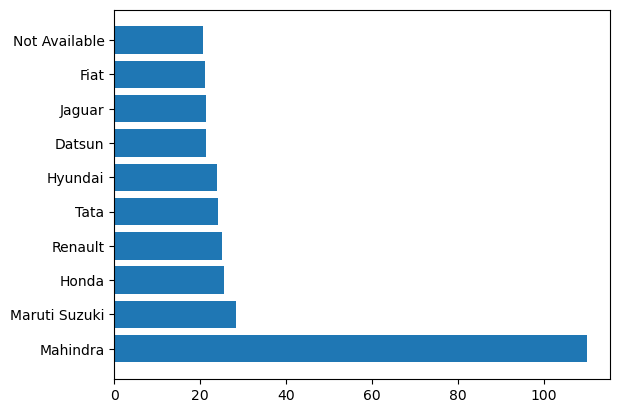

In [25]:
plt.barh(SS["Make"],SS["City_Mileage_km_litre"]) 

This code is designed to find and visualize the top 145 cars with the best city mileage, showcasing the most fuel-efficient models in city driving conditions. The resulting bar chart would highlight:

Fuel Efficiency Leaders: The horizontal bar chart will show car makes with the highest city mileage values at the top, indicating which manufacturers or models lead in fuel efficiency for city driving.
Make-wise Mileage Comparison: Grouping by "Make" makes it easy to compare fuel efficiency across different brands, helping to understand which manufacturers offer the most economical options for city driving.
This visualization offers insights into fuel economy for urban driving, valuable for customers interested in reducing fuel costs or choosing environmentally-friendly options

In [27]:
# Task 4 :Top 20 non electric car manufacure based on the city mileage and display the result using a bar graph
Electric=SALES[SALES["Fuel_Type"]!="Electric"]
Electric

,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,Length_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
0,Tata,Nano Genx,Xt,624.0,2.0,2.0,24.0,Petrol,1652.0,3164.0,...,Yes,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available
1,Tata,Nano Genx,Xe,624.0,2.0,2.0,24.0,Petrol,1652.0,3164.0,...,Not Available,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available
2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,15.0,CNG,1652.0,3164.0,...,Not Available,Yes,Yes,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available
3,Tata,Nano Genx,Xta,624.0,2.0,2.0,24.0,Petrol,1652.0,3164.0,...,Yes,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available
4,Tata,Nano Genx,Xm,624.0,2.0,2.0,24.0,Petrol,1652.0,3164.0,...,Not Available,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,4440.0,...,Yes,Yes,Not Available,Not Available,Yes,Yes,1545 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes
1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,4440.0,...,Yes,Yes,Not Available,Not Available,Yes,Yes,1550 kg,"Drive side airbag, Curtain airbags, Driver fro...",Yes,Yes
1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,4440.0,...,Yes,Yes,Not Available,Not Available,Yes,Yes,1482 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes
1274,Honda,City,V Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,4440.0,...,Yes,Yes,Not Available,Not Available,Yes,Yes,1455 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes


In [28]:
AA=Electric.loc[:,["Make","City_Mileage_km_litre"]]
AA

,Make,City_Mileage_km_litre
0,Tata,23.60
1,Tata,23.60
2,Tata,15.29
3,Tata,23.60
4,Tata,23.60
...,...,...
1271,Honda,22.60
1272,Honda,22.60
1273,Honda,18.00
1274,Honda,14.30


In [29]:
sort_A=AA.sort_values("City_Mileage_km_litre",ascending=False)
sort_A

,Make,City_Mileage_km_litre
164,Maruti Suzuki,28.4
155,Maruti Suzuki,28.4
157,Maruti Suzuki,28.4
159,Maruti Suzuki,28.4
160,Maruti Suzuki,28.4
...,...,...
873,Ferrari,3.2
1172,Ferrari,3.2
876,Lamborghini,3.0
1263,Bentley,2.0


In [30]:
dup_AA=sort_A.drop_duplicates(subset="Make",keep="first")
dup_AA

,Make,City_Mileage_km_litre
164,Maruti Suzuki,28.40
944,Honda,25.50
19,Renault,25.17
451,Tata,24.12
389,Hyundai,24.00
412,Mahindra,22.25
6,Datsun,21.38
1043,Jaguar,21.27
1222,Fiat,21.20
886,Not Available,20.62


In [31]:
head_20=dup_AA.head(20)
head_20

,Make,City_Mileage_km_litre
164,Maruti Suzuki,28.40
944,Honda,25.50
19,Renault,25.17
451,Tata,24.12
389,Hyundai,24.00
412,Mahindra,22.25
6,Datsun,21.38
1043,Jaguar,21.27
1222,Fiat,21.20
886,Not Available,20.62


<BarContainer object of 20 artists>

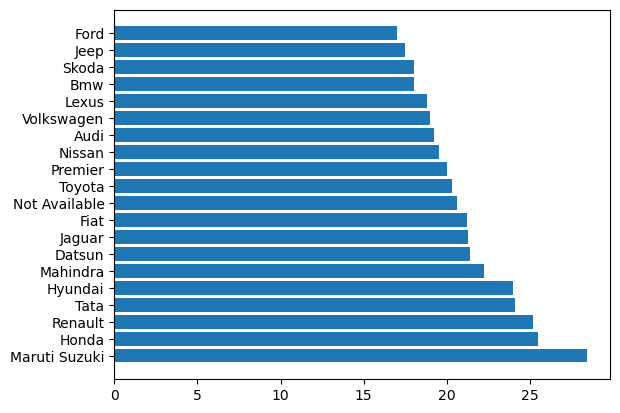

In [32]:
plt.barh(head_20["Make"],head_20["City_Mileage_km_litre"])

The code filters out electric cars to analyze the city mileage of non-electric cars specifically. By selecting unique manufacturers and identifying the top 20 based on city mileage, the analysis emphasizes the best-performing brands in terms of city fuel efficiency. The horizontal bar chart provides a visual ranking, enabling a clear comparison of these top manufacturers.

This analysis can be valuable for consumers interested in finding the most fuel-efficient non-electric cars for city driving and for car manufacturers seeking insights into competitors’ fuel efficiency standards.

In [34]:
# Task 5 :Display the car mileages forthe following four companies and display the result using pivot table(hyundai,mahindra,renault,skoda) mean and median
hyundai=SALES[SALES['Make']=="Hyundai"]
hyundai

,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,Length_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
46,Hyundai,Santro,Era Mt,1086.0,4.0,4.0,35.0,Petrol,1560.0,3610.0,...,Not Available,Yes,Not Available,Not Available,Not Available,Yes,NaN,Driver frontal airbag,Yes,Yes
47,Hyundai,Santro,Magna Mt,1086.0,4.0,4.0,35.0,Petrol,1560.0,3610.0,...,Yes,Yes,Not Available,Not Available,Not Available,Yes,NaN,Driver frontal airbag,Yes,Yes
48,Hyundai,Santro,Magna Mt Cng,1086.0,4.0,4.0,35.0,CNG,1560.0,3610.0,...,Yes,Yes,Not Available,Not Available,Not Available,Yes,NaN,Driver frontal airbag,Yes,Yes
49,Hyundai,Santro,Magna Amt,1086.0,4.0,4.0,35.0,Petrol,1560.0,3610.0,...,Yes,Yes,Not Available,Not Available,Not Available,Yes,NaN,Driver frontal airbag,Yes,Yes
50,Hyundai,Santro,Sportz Mt,1086.0,4.0,4.0,35.0,Petrol,1560.0,3610.0,...,Yes,Yes,Not Available,Not Available,Not Available,Yes,NaN,Driver frontal airbag,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,Hyundai,Creta,1.4 Crdi Ex,1396.0,4.0,4.0,55.0,Diesel,1630.0,4270.0,...,Yes,Yes,Not Available,Not Available,Yes,Yes,NaN,"Driver frontal airbag, Front passenger frontal...",Yes,Yes
1133,Hyundai,Creta,1.6 Vtvt Ex,1591.0,4.0,4.0,55.0,Petrol,1630.0,4270.0,...,Yes,Yes,Not Available,Not Available,Yes,Yes,NaN,"Driver frontal airbag, Front passenger frontal...",Yes,Yes
1134,Hyundai,Creta,Sports Edition Petrol,1591.0,4.0,4.0,55.0,Petrol,1630.0,4270.0,...,Yes,Yes,Not Available,Not Available,Yes,Yes,1758 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes
1135,Hyundai,Creta,Sports Edition Diesel,1582.0,4.0,4.0,55.0,Diesel,1665.0,4270.0,...,Yes,Yes,Not Available,Not Available,Yes,Yes,NaN,"Driver frontal airbag, Front passenger frontal...",Yes,Yes


In [35]:
mileage_hyundai=hyundai.loc[:,["Make","City_Mileage_km_litre","Highway_Mileage_km_litre"]]

In [36]:
mileage_hyundai

,Make,City_Mileage_km_litre,Highway_Mileage_km_litre
46,Hyundai,15.29,17.19
47,Hyundai,15.29,17.19
48,Hyundai,15.29,17.19
49,Hyundai,15.29,17.19
50,Hyundai,15.29,17.19
...,...,...,...
1132,Hyundai,21.38,17.19
1133,Hyundai,15.29,17.19
1134,Hyundai,15.29,17.19
1135,Hyundai,15.29,17.19


In [37]:
mean_mile_hyu=pd.pivot_table(mileage_hyundai,index="Make",values='City_Mileage_km_litre', aggfunc='mean')
mean_mile_hyu

,City_Mileage_km_litre
Make,
Hyundai,16.017


In [38]:
median_mile_hyun=pd.pivot_table(mileage_hyundai,index='Make',values="City_Mileage_km_litre",aggfunc="median")
median_mile_hyun

,City_Mileage_km_litre
Make,
Hyundai,15.29


In [39]:
mahindra=SALES[SALES.Make=="Mahindra"]
mahindra

,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,Length_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
212,Mahindra,Verito Vibe,D2,1461.0,4.0,2.0,50.0,Diesel,1540.0,3991.0,...,Not Available,Yes,Not Available,Not Available,Not Available,Not Available,1655 kg,Not Available,Not Available,Yes
213,Mahindra,Verito Vibe,D4,1461.0,4.0,2.0,50.0,Diesel,1540.0,3991.0,...,Yes,Yes,Not Available,Not Available,Not Available,Not Available,1655 kg,Not Available,Yes,Yes
214,Mahindra,Verito Vibe,D6,1461.0,4.0,2.0,50.0,Diesel,1540.0,3991.0,...,Yes,Yes,Not Available,Not Available,Not Available,Yes,1655 kg,Driver frontal airbag,Yes,Yes
239,Mahindra,Alturas G4,2Wd At,2157.0,4.0,4.0,70.0,Diesel,1845.0,4850.0,...,Yes,Yes,Yes,Not Available,Not Available,Yes,NaN,"Driver frontal airbag, Front passenger frontal...",Yes,Yes
240,Mahindra,Alturas G4,4Wd At,2157.0,4.0,4.0,70.0,Diesel,1845.0,4850.0,...,Yes,Yes,Yes,Not Available,Not Available,Yes,NaN,"Front passenger curtain airbag, Driver curtain...",Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,Mahindra,Nuvosport,N6 Amt,1493.0,3.0,4.0,60.0,Diesel,1870.0,3985.0,...,Yes,Yes,Not Available,Not Available,Not Available,Yes,2220 kg,"Driver frontal airbag, Front passenger frontal...",Not Available,Yes
1195,Mahindra,Nuvosport,N8 Amt,1493.0,3.0,4.0,60.0,Diesel,1870.0,3985.0,...,Yes,Yes,Not Available,Not Available,Not Available,Yes,2220 kg,"Driver frontal airbag, Front passenger frontal...",Not Available,Yes
1255,Mahindra,Verito,1.5 D2,1461.0,4.0,3.0,50.0,Diesel,1540.0,4277.0,...,Not Available,Yes,Not Available,Not Available,Not Available,Not Available,1630 kg,Not Available,Not Available,Not Available
1256,Mahindra,Verito,1.5 D4 Bs-Iv,1461.0,4.0,3.0,50.0,Diesel,1540.0,4277.0,...,Yes,Yes,Not Available,Not Available,Not Available,Not Available,1630 kg,Not Available,Yes,Not Available


In [40]:
mileage_mahindra=mahindra.loc[:,["Make","City_Mileage_km_litre","Highway_Mileage_km_litre"]]
mileage_mahindra

,Make,City_Mileage_km_litre,Highway_Mileage_km_litre
212,Mahindra,18.00,20.08
213,Mahindra,18.00,20.08
214,Mahindra,18.00,20.08
239,Mahindra,15.29,17.19
240,Mahindra,15.29,17.19
...,...,...,...
1194,Mahindra,12.80,16.21
1195,Mahindra,12.80,16.21
1255,Mahindra,18.00,20.08
1256,Mahindra,18.00,20.08


In [41]:
mean_mahindra=pd.pivot_table(mileage_mahindra,index="Make",values="City_Mileage_km_litre",aggfunc="mean")
mean_mahindra

,City_Mileage_km_litre
Make,
Mahindra,18.973866


In [42]:
median_mahindra=pd.pivot_table(mileage_mahindra,index="Make",values="City_Mileage_km_litre",aggfunc="median")
median_mahindra

,City_Mileage_km_litre
Make,
Mahindra,15.5


In [43]:
renault=SALES[SALES.Make=="Renault"]
renault

,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,Length_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
12,Renault,Kwid,Rxe 0.8,799.0,3.0,4.0,28.0,Petrol,1490.0,3731.0,...,Not Available,Yes,Not Available,Not Available,Not Available,Yes,NaN,Driver frontal airbag,Yes,Yes
13,Renault,Kwid,Std 0.8,799.0,3.0,4.0,28.0,Petrol,1490.0,3731.0,...,Not Available,Not Available,Not Available,Not Available,Not Available,Yes,NaN,Driver frontal airbag,Not Available,Yes
14,Renault,Kwid,Rxl 0.8,799.0,3.0,4.0,28.0,Petrol,1490.0,3731.0,...,Yes,Yes,Not Available,Not Available,Not Available,Yes,NaN,Driver frontal airbag,Yes,Yes
15,Renault,Kwid,Rxt 0.8,799.0,3.0,4.0,28.0,Petrol,1490.0,3731.0,...,Not Available,Yes,Not Available,Not Available,Not Available,Yes,NaN,Driver frontal airbag,Yes,Yes
16,Renault,Kwid,Rxt 1.0,999.0,3.0,4.0,28.0,Petrol,1490.0,3731.0,...,Yes,Yes,Not Available,Not Available,Not Available,Yes,NaN,Driver frontal airbag,Yes,Yes
17,Renault,Kwid,Climber 1.0 Mt,999.0,3.0,4.0,28.0,Petrol,1490.0,3731.0,...,Yes,Yes,Not Available,Not Available,Not Available,Yes,NaN,Driver frontal airbag,Yes,Yes
18,Renault,Kwid,Rxt Amt 1.0,999.0,3.0,4.0,28.0,Petrol,1490.0,3731.0,...,Yes,Yes,Not Available,Not Available,Not Available,Yes,NaN,Driver frontal airbag,Yes,Yes
19,Renault,Kwid,Climber Amt 1.0,999.0,3.0,4.0,28.0,Petrol,1490.0,3731.0,...,Yes,Yes,Not Available,Not Available,Not Available,Yes,NaN,Driver frontal airbag,Yes,Yes
20,Renault,Kwid,Rxt (O) 1.0,999.0,3.0,4.0,28.0,Petrol,1490.0,3731.0,...,Yes,Yes,Not Available,Not Available,Not Available,Yes,NaN,"Driver frontal airbag, Front passenger frontal...",Yes,Yes
21,Renault,Kwid,Rxt (O) Amt 1.0,999.0,3.0,4.0,28.0,Petrol,1490.0,3731.0,...,Yes,Yes,Not Available,Not Available,Not Available,Yes,NaN,"Driver frontal airbag, Front passenger frontal...",Yes,Yes


In [44]:
mileage_renault=renault.loc[:,["Make","City_Mileage_km_litre","Highway_Mileage_km_litre"]]
mileage_renault

,Make,City_Mileage_km_litre,Highway_Mileage_km_litre
12,Renault,25.17,17.19
13,Renault,25.17,17.19
14,Renault,25.17,17.19
15,Renault,25.17,17.19
16,Renault,25.17,17.19
17,Renault,25.17,17.19
18,Renault,25.17,17.19
19,Renault,25.17,17.19
20,Renault,25.17,17.19
21,Renault,25.17,17.19


In [45]:
mean_renault=pd.pivot_table(mileage_renault,index="Make",values="City_Mileage_km_litre",aggfunc="mean")
mean_renault

,City_Mileage_km_litre
Make,
Renault,19.384444


In [46]:
median_renault=pd.pivot_table(mileage_renault,index="Make",values="City_Mileage_km_litre",aggfunc="median")
median_renault

,City_Mileage_km_litre
Make,
Renault,21.04


In [47]:
skoda=SALES[SALES.Make=="Skoda"]
skoda

,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,Length_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
246,Skoda,Superb Sportline,Sportline 1.8L Tsi At,1798.0,4.0,4.0,66.0,Petrol,1483.0,4861.0,...,Yes,Yes,Yes,Not Available,Not Available,Yes,2030 kg,"Drive side airbag, Driver frontal airbag, Curt...",Yes,Yes
247,Skoda,Superb Sportline,Sportline 2.0L Tdi At,1968.0,4.0,4.0,66.0,Diesel,1483.0,4861.0,...,Yes,Yes,Yes,Not Available,Not Available,Yes,2060 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes
259,Skoda,Kodiaq,Style 2.0 Tdi 4X4 At,1968.0,4.0,4.0,66.0,Diesel,1483.0,4861.0,...,Yes,Yes,Yes,Not Available,Not Available,Yes,2060 kg,"Drive side airbag, Driver frontal airbag, Fron...",Yes,Yes
260,Skoda,Kodiaq,Laurin And Klement,1968.0,4.0,4.0,66.0,Diesel,1483.0,4861.0,...,Yes,Yes,Yes,Not Available,Not Available,Yes,2060 kg,"Drive side airbag, Driver frontal airbag, Fron...",Yes,Yes
261,Skoda,Kodiaq,Corporate Edition,1968.0,4.0,4.0,66.0,Diesel,1483.0,4861.0,...,Yes,Yes,Yes,Not Available,Not Available,Yes,2060 kg,"Driver head airbag, Drive side airbag, Driver ...",Yes,Yes
662,Skoda,Monte Carlo,Monte Carlo 1.5 Tdi At,1498.0,4.0,4.0,55.0,Diesel,1466.0,4413.0,...,Yes,Yes,Yes,Not Available,Not Available,Yes,1770 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes
663,Skoda,Monte Carlo,Monte Carlo 1.6 Mpi At,1598.0,4.0,4.0,55.0,Petrol,1466.0,4413.0,...,Yes,Yes,Yes,Not Available,Not Available,Yes,1710 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes
664,Skoda,Monte Carlo,Monte Carlo 1.5 Tdi Mt,1498.0,4.0,4.0,55.0,Diesel,1466.0,4413.0,...,Yes,Yes,Not Available,Not Available,Not Available,Yes,1750 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes
665,Skoda,Monte Carlo,Monte Carlo 1.6 Mpi Mt,1598.0,4.0,4.0,55.0,Petrol,1466.0,4413.0,...,Yes,Yes,Not Available,Not Available,Not Available,Yes,1680 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes
752,Skoda,Superb,Style 1.8 Tsi Mt,1798.0,4.0,4.0,66.0,Petrol,1483.0,4861.0,...,Yes,Yes,Yes,Not Available,Not Available,Yes,2010 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes


In [48]:
mileage_skoda=skoda.loc[:,["Make","City_Mileage_km_litre","Highway_Mileage_km_litre"]]
mileage_skoda

,Make,City_Mileage_km_litre,Highway_Mileage_km_litre
246,Skoda,11.30,13.70
247,Skoda,15.10,18.19
259,Skoda,15.10,18.19
260,Skoda,15.10,18.19
261,Skoda,15.10,18.19
662,Skoda,18.00,21.72
663,Skoda,12.00,14.84
664,Skoda,18.00,21.13
665,Skoda,12.00,15.41
752,Skoda,10.60,14.12


In [49]:
mean_skoda=pd.pivot_table(mileage_skoda,index="Make",values="City_Mileage_km_litre",aggfunc="mean")
mean_skoda

,City_Mileage_km_litre
Make,
Skoda,14.357442


In [50]:
median_skoda=pd.pivot_table(mileage_skoda,index="Make",values="City_Mileage_km_litre",aggfunc="median")
median_skoda

,City_Mileage_km_litre
Make,
Skoda,15.1


In [51]:
mean_highway_hyundai=pd.pivot_table(mileage_hyundai,index="Make",values="Highway_Mileage_km_litre",aggfunc="mean")
mean_highway_hyundai

,Highway_Mileage_km_litre
Make,
Hyundai,17.538231


In [52]:
median_highway_hyundai=pd.pivot_table(mileage_hyundai,index='Make',values="Highway_Mileage_km_litre",aggfunc="median")
median_highway_hyundai

,Highway_Mileage_km_litre
Make,
Hyundai,17.19


In [53]:
mean_highway_mahindra=pd.pivot_table(mileage_mahindra,index="Make",values="Highway_Mileage_km_litre",aggfunc="mean")
mean_highway_mahindra

,Highway_Mileage_km_litre
Make,
Mahindra,17.645126


In [54]:
median_highway_mahindra=pd.pivot_table(mileage_mahindra,index="Make",values="Highway_Mileage_km_litre",aggfunc="median")
median_highway_mahindra

,Highway_Mileage_km_litre
Make,
Mahindra,17.19


In [55]:
mean_highway_renault=pd.pivot_table(mileage_renault,index="Make",values="Highway_Mileage_km_litre",aggfunc="mean")
mean_highway_renault

,Highway_Mileage_km_litre
Make,
Renault,17.315


In [56]:
median_highway_renault=pd.pivot_table(mileage_renault,index="Make",values="Highway_Mileage_km_litre",aggfunc="median")
median_highway_renault

,Highway_Mileage_km_litre
Make,
Renault,17.19


In [57]:
mean_highway_skoda=pd.pivot_table(mileage_skoda,index="Make",values="Highway_Mileage_km_litre",aggfunc="mean")
mean_highway_skoda

,Highway_Mileage_km_litre
Make,
Skoda,17.252093


In [58]:
median_highway_skoda=pd.pivot_table(mileage_skoda,index="Make",values="Highway_Mileage_km_litre",aggfunc="median")
median_highway_skoda

,Highway_Mileage_km_litre
Make,
Skoda,17.19


In [59]:
mean_mile_hyu

,City_Mileage_km_litre
Make,
Hyundai,16.017


In [60]:
mean_mahindra

,City_Mileage_km_litre
Make,
Mahindra,18.973866


In [61]:
mean_renault

,City_Mileage_km_litre
Make,
Renault,19.384444


In [62]:
mean_skoda

,City_Mileage_km_litre
Make,
Skoda,14.357442


INTERPRETATION
The code creates a summary of city and highway mileage for Hyundai, Renault, Mahindra, and Skoda, displaying both the mean and median values for each manufacturer. This data can be used to:
Compare fuel efficiency across these manufacturers. Understand typical mileage values (mean) versus more central mileage values (median), which may reduce the impact of extreme outliers. Gain insights into which manufacturer tends to have better fuel efficiency in city or highway conditions. This analysis can guide decisions on recommending specific car brands based on their fuel performance metrics.

In [65]:
# Task 6: Display the mean and median values of city mileage of the hyundai renault,mahindra and skoda  using stacked column chart
mileage_hyundai

,Make,City_Mileage_km_litre,Highway_Mileage_km_litre
46,Hyundai,15.29,17.19
47,Hyundai,15.29,17.19
48,Hyundai,15.29,17.19
49,Hyundai,15.29,17.19
50,Hyundai,15.29,17.19
...,...,...,...
1132,Hyundai,21.38,17.19
1133,Hyundai,15.29,17.19
1134,Hyundai,15.29,17.19
1135,Hyundai,15.29,17.19


In [66]:
Mean_Hyundai=mileage_hyundai['City_Mileage_km_litre'].mean()
Mean_Hyundai

16.017

In [67]:
Median_Hyundai=mileage_hyundai["City_Mileage_km_litre"].median()
Median_Hyundai

15.29

In [68]:
Mean_Renault=mileage_renault["City_Mileage_km_litre"].mean()
Mean_Renault

19.38444444444444

In [69]:
Median_Renault=mileage_renault["City_Mileage_km_litre"].median()
Median_Renault

21.04

In [70]:
Mean_Skoda=mileage_skoda["City_Mileage_km_litre"].mean()
Mean_Skoda

14.357441860465114

In [71]:
Median_Skoda=mileage_skoda["City_Mileage_km_litre"].median()
Median_Skoda

15.1

In [72]:
Mean_Mahindra=mileage_mahindra["City_Mileage_km_litre"].mean()
Mean_Mahindra

18.973865546218494

In [73]:
Median_Mahindra=mileage_mahindra["City_Mileage_km_litre"].median()
Median_Mahindra

15.5

In [74]:
mean_cars=pd.DataFrame({"Make":["Hyundai","Renault","Skoda","Mahindra"],"Mean_Values":[Mean_Hyundai,Mean_Renault,Mean_Skoda,Mean_Mahindra],"Median_Values":[Median_Hyundai,Median_Renault,Median_Skoda,Median_Mahindra]})
mean_cars                 

,Make,Mean_Values,Median_Values
0,Hyundai,16.017000,15.29
1,Renault,19.384444,21.04
2,Skoda,14.357442,15.10
3,Mahindra,18.973866,15.50


<Axes: >

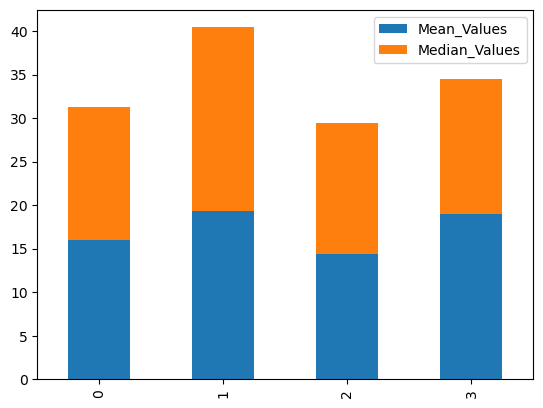

In [75]:
mean_cars.plot(y=["Mean_Values", "Median_Values"],
               kind='bar',
               stacked=True)


This bar chart visualizes the mean and median values for various car makes: Hyundai, Renault, Skoda, and Mahindra. By stacking the mean and median values, we can easily compare each brand's central tendency, observing any significant variations between them. If the mean and median are close, it suggests a symmetric distribution of values; however, large differences may indicate skewness in the data. This visualization helps quickly identify which car brands might have higher or lower average and median values, offering insights into overall pricing or performance levels among the brands

In [77]:
SALES.shape

(1276, 29)

In [78]:
# Task 7:Display the average mileage of all manufactures using a horizontal bar chart
SALES.insert(29, "Average_Mileage", (SALES.City_Mileage_km_litre + SALES.Highway_Mileage_km_litre) / 2)
SALES

,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,Length_mm,...,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,Average_Mileage
0,Tata,Nano Genx,Xt,624.0,2.0,2.0,24.0,Petrol,1652.0,3164.0,...,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available,20.395
1,Tata,Nano Genx,Xe,624.0,2.0,2.0,24.0,Petrol,1652.0,3164.0,...,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available,20.395
2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,15.0,CNG,1652.0,3164.0,...,Yes,Yes,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available,16.240
3,Tata,Nano Genx,Xta,624.0,2.0,2.0,24.0,Petrol,1652.0,3164.0,...,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available,20.395
4,Tata,Nano Genx,Xm,624.0,2.0,2.0,24.0,Petrol,1652.0,3164.0,...,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available,20.395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,4440.0,...,Yes,Not Available,Not Available,Yes,Yes,1545 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,23.850
1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,4440.0,...,Yes,Not Available,Not Available,Yes,Yes,1550 kg,"Drive side airbag, Curtain airbags, Driver fro...",Yes,Yes,23.850
1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,4440.0,...,Yes,Not Available,Not Available,Yes,Yes,1482 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes,18.000
1274,Honda,City,V Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,4440.0,...,Yes,Not Available,Not Available,Yes,Yes,1455 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,15.350


In [79]:
grouped=SALES.groupby(by="Make")[["Average_Mileage"]].mean()
grouped

,Average_Mileage
Make,
Aston Martin,9.698333
Audi,14.932419
Bajaj,16.240000
Bentley,8.065000
Bmw,15.637027
Bugatti,16.240000
Datsun,18.845000
Dc,9.000000
Ferrari,9.596250


In [80]:
sort_group=grouped.sort_values("Average_Mileage",ascending=True).reset_index()
sort_group

,Make,Average_Mileage
0,Bentley,8.065000
1,Dc,9.000000
2,Maserati,9.035556
3,Ferrari,9.596250
4,Aston Martin,9.698333
5,Mitsubishi,9.806429
6,Icml,9.860000
7,Lamborghini,10.461154
8,Isuzu,10.800000
9,Porsche,12.237857


<BarContainer object of 40 artists>

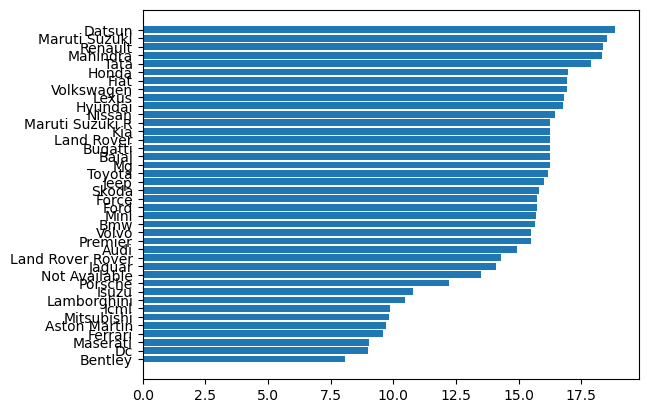

In [334]:
plt.barh(sort_group["Make"],sort_group["Average_Mileage"])

INTERPRETATION
This horizontal bar chart displays the average mileage for different car brands, ranked from highest to lowest. By averaging city and highway mileage, we get a general view of each brand's fuel efficiency. Brands at the top of the chart demonstrate higher average mileage, indicating better fuel efficiency compared to those lower down. This chart provides a quick visual comparison, helping consumers or analysts easily identify which brands offer better mileage on average, which can be a key factor in cost savings over time

In [83]:
SALES

,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,Length_mm,...,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,Average_Mileage
0,Tata,Nano Genx,Xt,624.0,2.0,2.0,24.0,Petrol,1652.0,3164.0,...,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available,20.395
1,Tata,Nano Genx,Xe,624.0,2.0,2.0,24.0,Petrol,1652.0,3164.0,...,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available,20.395
2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,15.0,CNG,1652.0,3164.0,...,Yes,Yes,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available,16.240
3,Tata,Nano Genx,Xta,624.0,2.0,2.0,24.0,Petrol,1652.0,3164.0,...,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available,20.395
4,Tata,Nano Genx,Xm,624.0,2.0,2.0,24.0,Petrol,1652.0,3164.0,...,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available,20.395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,4440.0,...,Yes,Not Available,Not Available,Yes,Yes,1545 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,23.850
1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,4440.0,...,Yes,Not Available,Not Available,Yes,Yes,1550 kg,"Drive side airbag, Curtain airbags, Driver fro...",Yes,Yes,23.850
1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,4440.0,...,Yes,Not Available,Not Available,Yes,Yes,1482 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes,18.000
1274,Honda,City,V Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,4440.0,...,Yes,Not Available,Not Available,Yes,Yes,1455 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,15.350


In [84]:
# Task 9: Analyze the spread of the fuel economy using a histogram for hyundai,suzuki,tata and bmw and find skew for the mentioned cars
SEGREGATE=SALES.loc[:,["Make","Displacement","City_Mileage_km_litre"]]
SEGREGATE

,Make,Displacement,City_Mileage_km_litre
0,Tata,624.0,23.60
1,Tata,624.0,23.60
2,Tata,624.0,15.29
3,Tata,624.0,23.60
4,Tata,624.0,23.60
...,...,...,...
1271,Honda,1498.0,22.60
1272,Honda,1498.0,22.60
1273,Honda,1497.0,18.00
1274,Honda,1497.0,14.30


In [85]:
sort_seg=SEGREGATE.sort_values("City_Mileage_km_litre",ascending=False)
sort_seg

,Make,Displacement,City_Mileage_km_litre
688,Mahindra,72.0,110.0
689,Mahindra,72.0,110.0
687,Mahindra,72.0,110.0
616,Mahindra,1497.0,80.0
615,Mahindra,1497.0,80.0
...,...,...,...
873,Ferrari,3902.0,3.2
872,Ferrari,3902.0,3.2
876,Lamborghini,6498.0,3.0
1264,Bentley,5998.0,2.0


In [86]:
dup_seg=sort_seg.drop_duplicates(subset='Make',keep='first')
dup_seg

,Make,Displacement,City_Mileage_km_litre
688,Mahindra,72.0,110.00
160,Maruti Suzuki,1248.0,28.40
944,Honda,1498.0,25.50
21,Renault,999.0,25.17
456,Tata,1199.0,24.12
389,Hyundai,1120.0,24.00
7,Datsun,799.0,21.38
1043,Jaguar,1999.0,21.27
1224,Fiat,1248.0,21.20
887,Not Available,1198.0,20.62


In [87]:
top_10=dup_seg.head(10)
top_10

,Make,Displacement,City_Mileage_km_litre
688,Mahindra,72.0,110.00
160,Maruti Suzuki,1248.0,28.40
944,Honda,1498.0,25.50
21,Renault,999.0,25.17
456,Tata,1199.0,24.12
389,Hyundai,1120.0,24.00
7,Datsun,799.0,21.38
1043,Jaguar,1999.0,21.27
1224,Fiat,1248.0,21.20
887,Not Available,1198.0,20.62


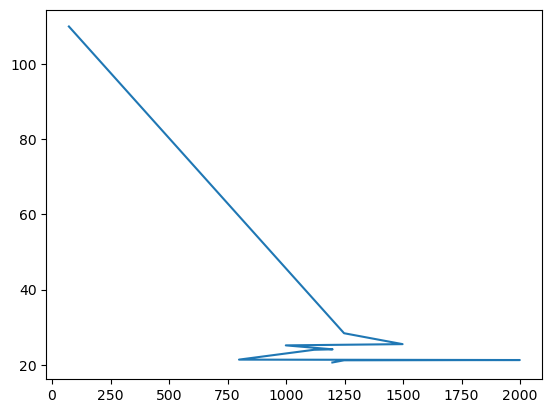

In [88]:
# Task 8
plt.plot(top_10["Displacement"],top_10["City_Mileage_km_litre"])

INTERPRETATION:
This line plot shows the relationship between engine displacement and city mileage for the top 10 car brands with the highest city mileage, with each brand represented only once. The trend in the plot can help indicate how changes in engine displacement might affect fuel efficiency in city driving conditions. If there's a visible pattern, such as decreasing mileage with increased displacement, it may suggest that larger engines typically consume more fuel in city driving. This analysis can guide consumers interested in balancing engine power and fuel efficiency.

In [90]:
HYUNDAI_DATA=SALES[SALES['Make']=='Hyundai']
HYUNDAI_DATA

,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,Length_mm,...,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,Average_Mileage
46,Hyundai,Santro,Era Mt,1086.0,4.0,4.0,35.0,Petrol,1560.0,3610.0,...,Yes,Not Available,Not Available,Not Available,Yes,NaN,Driver frontal airbag,Yes,Yes,16.240
47,Hyundai,Santro,Magna Mt,1086.0,4.0,4.0,35.0,Petrol,1560.0,3610.0,...,Yes,Not Available,Not Available,Not Available,Yes,NaN,Driver frontal airbag,Yes,Yes,16.240
48,Hyundai,Santro,Magna Mt Cng,1086.0,4.0,4.0,35.0,CNG,1560.0,3610.0,...,Yes,Not Available,Not Available,Not Available,Yes,NaN,Driver frontal airbag,Yes,Yes,16.240
49,Hyundai,Santro,Magna Amt,1086.0,4.0,4.0,35.0,Petrol,1560.0,3610.0,...,Yes,Not Available,Not Available,Not Available,Yes,NaN,Driver frontal airbag,Yes,Yes,16.240
50,Hyundai,Santro,Sportz Mt,1086.0,4.0,4.0,35.0,Petrol,1560.0,3610.0,...,Yes,Not Available,Not Available,Not Available,Yes,NaN,Driver frontal airbag,Yes,Yes,16.240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,Hyundai,Creta,1.4 Crdi Ex,1396.0,4.0,4.0,55.0,Diesel,1630.0,4270.0,...,Yes,Not Available,Not Available,Yes,Yes,NaN,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,19.285
1133,Hyundai,Creta,1.6 Vtvt Ex,1591.0,4.0,4.0,55.0,Petrol,1630.0,4270.0,...,Yes,Not Available,Not Available,Yes,Yes,NaN,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,16.240
1134,Hyundai,Creta,Sports Edition Petrol,1591.0,4.0,4.0,55.0,Petrol,1630.0,4270.0,...,Yes,Not Available,Not Available,Yes,Yes,1758 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,16.240
1135,Hyundai,Creta,Sports Edition Diesel,1582.0,4.0,4.0,55.0,Diesel,1665.0,4270.0,...,Yes,Not Available,Not Available,Yes,Yes,NaN,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,16.240


In [91]:
HYUNDAI_SEP=HYUNDAI_DATA.loc[:,["Make","Average_Mileage"]]
HYUNDAI_SEP

,Make,Average_Mileage
46,Hyundai,16.240
47,Hyundai,16.240
48,Hyundai,16.240
49,Hyundai,16.240
50,Hyundai,16.240
...,...,...
1132,Hyundai,19.285
1133,Hyundai,16.240
1134,Hyundai,16.240
1135,Hyundai,16.240


(array([ 8.,  0., 84., 12.,  7., 10.,  5.,  2.,  0.,  2.]),
 array([13.125 , 14.2125, 15.3   , 16.3875, 17.475 , 18.5625, 19.65  ,
        20.7375, 21.825 , 22.9125, 24.    ]),
 <BarContainer object of 10 artists>)

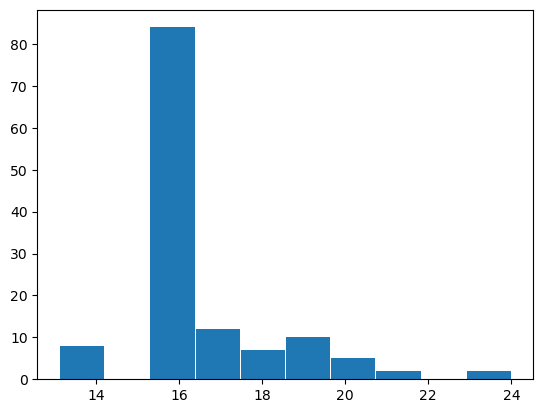

In [92]:
plt.hist(HYUNDAI_SEP["Average_Mileage"],rwidth=0.98)

In [93]:
SUZUKI_DATA=SALES[SALES.Make=='Maruti Suzuki']
SUZUKI_DATA

,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,Length_mm,...,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,Average_Mileage
24,Maruti Suzuki,Eeco,5 Str,1196.0,4.0,4.0,40.0,Petrol,1800.0,3675.0,...,Yes,Not Available,Normal,Yes,Yes,1510 kg,Driver frontal airbag,Not Available,Not Available,13.500
25,Maruti Suzuki,Eeco,7 Str,1196.0,4.0,4.0,40.0,Petrol,1800.0,3675.0,...,Yes,Not Available,Normal,Yes,Yes,1540 kg,Driver frontal airbag,Not Available,Not Available,13.500
26,Maruti Suzuki,Eeco,5 Str With Ac+Htr,1196.0,4.0,4.0,40.0,Petrol,1800.0,3675.0,...,Yes,Not Available,Not Available,Not Available,Not Available,1510 kg,Not Available,Not Available,Not Available,13.000
27,Maruti Suzuki,Eeco,5 Str With Ac+Htr Cng,1196.0,4.0,4.0,40.0,CNG,1800.0,3675.0,...,Yes,Not Available,Normal,Yes,Yes,1510 kg,Driver frontal airbag,Not Available,Not Available,16.240
28,Maruti Suzuki,Eeco,5 Str With Htr Cng,1196.0,4.0,4.0,40.0,CNG,1800.0,3675.0,...,Yes,Not Available,Normal,Yes,Yes,1510 kg,Driver frontal airbag,Not Available,Not Available,16.240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,Maruti Suzuki,Ciaz,1.5L Zeta At Smart Hybrid,1462.0,4.0,4.0,43.0,Petrol,1485.0,4490.0,...,Yes,Yes,Not Available,Not Available,Yes,1520 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,16.240
1099,Maruti Suzuki,Ciaz,1.5L Alpha At Smart Hybrid,1462.0,4.0,4.0,43.0,Petrol,1485.0,4490.0,...,Yes,Yes,Not Available,Not Available,Yes,1520 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,16.240
1100,Maruti Suzuki,Ciaz,1.5L Alpha,1498.0,4.0,4.0,43.0,Diesel,1485.0,4490.0,...,Yes,Not Available,Normal,Not Available,Yes,1590 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,22.005
1101,Maruti Suzuki,Ciaz,1.5L Delta,1498.0,4.0,4.0,43.0,Diesel,1485.0,4490.0,...,Yes,Not Available,Not Available,Not Available,Yes,1590 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,21.755


In [94]:
SUZUKI_SEP=SUZUKI_DATA.loc[:,["Make","Average_Mileage"]]
SUZUKI_SEP

,Make,Average_Mileage
24,Maruti Suzuki,13.500
25,Maruti Suzuki,13.500
26,Maruti Suzuki,13.000
27,Maruti Suzuki,16.240
28,Maruti Suzuki,16.240
...,...,...
1098,Maruti Suzuki,16.240
1099,Maruti Suzuki,16.240
1100,Maruti Suzuki,22.005
1101,Maruti Suzuki,21.755


(array([ 5.,  2.,  5., 58.,  8.,  1., 15., 10.,  4., 41.]),
 array([12.5   , 13.5295, 14.559 , 15.5885, 16.618 , 17.6475, 18.677 ,
        19.7065, 20.736 , 21.7655, 22.795 ]),
 <BarContainer object of 10 artists>)

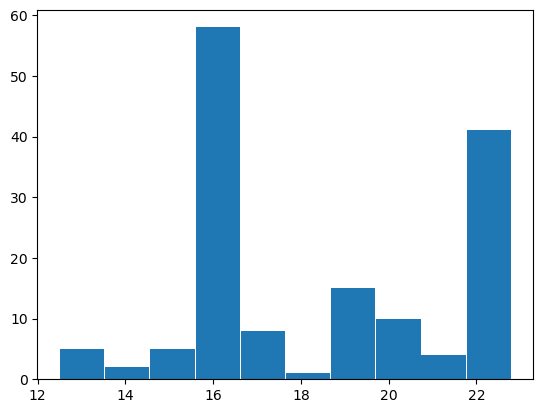

In [95]:
plt.hist(SUZUKI_SEP["Average_Mileage"],rwidth=0.98)

In [96]:
TATA_DATA=SALES[SALES.Make=="Tata"]
TATA_DATA

,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,Length_mm,...,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,Average_Mileage
0,Tata,Nano Genx,Xt,624.0,2.0,2.0,24.0,Petrol,1652.0,3164.0,...,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available,20.395
1,Tata,Nano Genx,Xe,624.0,2.0,2.0,24.0,Petrol,1652.0,3164.0,...,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available,20.395
2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,15.0,CNG,1652.0,3164.0,...,Yes,Yes,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available,16.240
3,Tata,Nano Genx,Xta,624.0,2.0,2.0,24.0,Petrol,1652.0,3164.0,...,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available,20.395
4,Tata,Nano Genx,Xm,624.0,2.0,2.0,24.0,Petrol,1652.0,3164.0,...,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available,20.395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,Tata,Harrier,Revotorq Dark Edition,1956.0,3.0,4.0,50.0,Diesel,1706.0,4598.0,...,Yes,Yes,Not Available,Not Available,Yes,NaN,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,16.240
1187,Tata,Tiago Nrg,1.2L Revotron,1199.0,3.0,4.0,35.0,Petrol,1587.0,3793.0,...,Yes,Not Available,Not Available,Not Available,Yes,NaN,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,16.240
1188,Tata,Tiago Nrg,1.05L Revotorq,1047.0,3.0,4.0,35.0,Diesel,1587.0,3793.0,...,Yes,Not Available,Not Available,Not Available,Yes,NaN,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,16.240
1189,Tata,Tiago Nrg,1.2L Revotron Amt,1199.0,3.0,4.0,35.0,Petrol,1587.0,3793.0,...,Yes,Not Available,Not Available,Not Available,Yes,NaN,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,16.240


In [97]:
TATA_SEP=TATA_DATA.loc[:,["Make","Average_Mileage"]]
TATA_SEP

,Make,Average_Mileage
0,Tata,20.395
1,Tata,20.395
2,Tata,16.240
3,Tata,20.395
4,Tata,20.395
...,...,...
1141,Tata,16.240
1187,Tata,16.240
1188,Tata,16.240
1189,Tata,16.240


(array([ 3.,  0.,  4., 56.,  4.,  1., 10.,  9.,  0., 13.]),
 array([11.9  , 13.102, 14.304, 15.506, 16.708, 17.91 , 19.112, 20.314,
        21.516, 22.718, 23.92 ]),
 <BarContainer object of 10 artists>)

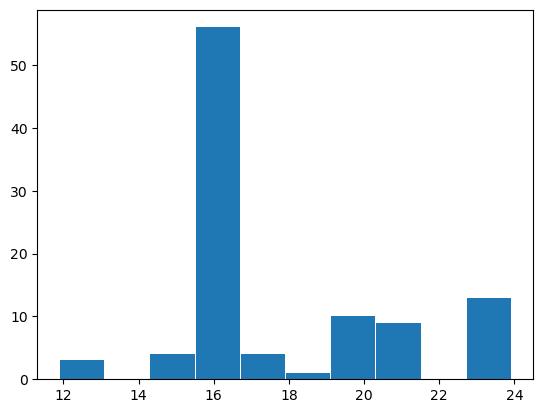

In [98]:
plt.hist(TATA_SEP["Average_Mileage"],rwidth=0.98)

In [99]:
BMW_DATA=SALES[SALES.Make=="Bmw"]
BMW_DATA

,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,Length_mm,...,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,Average_Mileage
288,Bmw,X3,Xdrive 20D Luxury Line,1995.0,4.0,4.0,67.0,Diesel,1678.0,4657.0,...,Yes,Yes,Not Available,Not Available,Yes,2300 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes,17.280
289,Bmw,X3,Xdrive 30I Luxury Line,1998.0,4.0,4.0,67.0,Petrol,1678.0,4657.0,...,Yes,Yes,Not Available,Not Available,Yes,2300 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes,17.280
290,Bmw,X3,Xdrive20D Xline,1995.0,4.0,4.0,67.0,Diesel,1678.0,4657.0,...,Yes,Yes,Not Available,Not Available,Yes,2300 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes,17.280
295,Bmw,X5,Xdrive30D Sport,2993.0,6.0,4.0,46.0,Diesel,1745.0,4922.0,...,Yes,Yes,Not Available,Not Available,Yes,NaN,"Driver head airbag, Front passenger head airba...",Yes,Yes,16.240
296,Bmw,X5,Xdrive30D Xline,2993.0,6.0,4.0,46.0,Diesel,1745.0,4922.0,...,Yes,Yes,Not Available,Not Available,Yes,NaN,"Driver head airbag, Front passenger head airba...",Yes,Yes,16.240
297,Bmw,X5,Xdrive40I M Sport,2998.0,6.0,4.0,46.0,Petrol,1745.0,4922.0,...,Yes,Yes,Not Available,Not Available,Yes,NaN,"Driver head airbag, Front passenger head airba...",Yes,Yes,16.240
304,Bmw,M2 Competition,Coupe,2979.0,6.0,4.0,52.0,Petrol,1410.0,4461.0,...,Not Available,Not Available,Not Available,Not Available,Yes,2010 kg,"Front passenger knee airbag, Rear passenger he...",Yes,Yes,10.400
315,Bmw,7-Series,730Ld Design Pure Excellence,2993.0,6.0,4.0,78.0,Diesel,1479.0,5120.0,...,Yes,Yes,"Normal, Comfort, Eco, Sport",Yes,Yes,2560 kg,"Driver head airbag, Front passenger head airba...",Yes,Yes,14.980
316,Bmw,7-Series,730Ld Design Pure Excellence Signature,2993.0,6.0,4.0,78.0,Diesel,1479.0,5120.0,...,Yes,Yes,"Normal, Comfort, Eco, Sport",Yes,Yes,2560 kg,"Driver head airbag, Front passenger head airba...",Yes,Yes,14.980
317,Bmw,7-Series,730Ld M Sport,2993.0,6.0,4.0,78.0,Diesel,1479.0,5120.0,...,Yes,Yes,"Normal, Comfort, Eco, Sport",Yes,Yes,2560 kg,"Driver head airbag, Front passenger head airba...",Yes,Yes,14.980


In [100]:
BMW_SEP=BMW_DATA.loc[:,["Make","Average_Mileage"]]
BMW_SEP

,Make,Average_Mileage
288,Bmw,17.280
289,Bmw,17.280
290,Bmw,17.280
295,Bmw,16.240
296,Bmw,16.240
297,Bmw,16.240
304,Bmw,10.400
315,Bmw,14.980
316,Bmw,14.980
317,Bmw,14.980


(array([ 1.,  0.,  2.,  1.,  0.,  0.,  4., 23.,  3.,  3.]),
 array([ 6.195 ,  7.5095,  8.824 , 10.1385, 11.453 , 12.7675, 14.082 ,
        15.3965, 16.711 , 18.0255, 19.34  ]),
 <BarContainer object of 10 artists>)

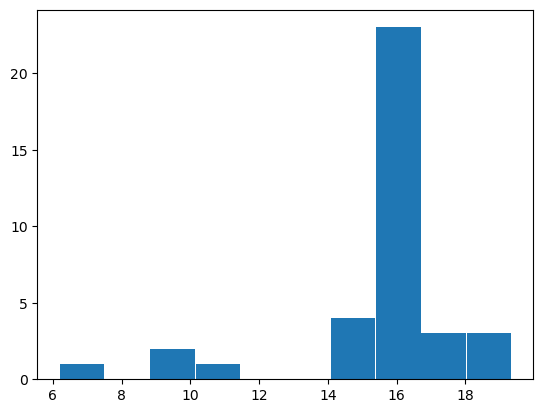

In [101]:
plt.hist(BMW_SEP["Average_Mileage"],rwidth=0.98)

In [102]:
HYUNDAI_SKEW=skew(HYUNDAI_SEP['Average_Mileage'])
HYUNDAI_SKEW

1.4273193719984483

In [103]:
SUZUKI_SKEW=skew(SUZUKI_SEP["Average_Mileage"])
SUZUKI_SKEW

0.18014616495094246

In [104]:
TATA_SKEW=skew(TATA_SEP["Average_Mileage"])
TATA_SKEW

0.8030518065036729

In [105]:
BMW_SKEW=skew(BMW_SEP["Average_Mileage"])
BMW_SKEW

-1.9515286643445837

In [106]:
total_skew=pd.DataFrame({"Manufactures":["Hyundai","Suzuki","Tata","Bmw"],"Skewness":[HYUNDAI_SKEW,SUZUKI_SKEW,TATA_SKEW,BMW_SKEW]})
total_skew

,Manufactures,Skewness
0,Hyundai,1.427319
1,Suzuki,0.180146
2,Tata,0.803052
3,Bmw,-1.951529


INTERPRETATION:
The skewness analysis provides insights into the distribution of average mileage for Hyundai, Maruti Suzuki, Tata, and BMW. Positive skewness indicates that most cars from that brand have lower-than-average mileage, with a few high-mileage outliers. Conversely, a negative skew would suggest a concentration of higher-mileage vehicles. A skewness value close to zero implies a more symmetric distribution of mileage. This summary helps in understanding each brand's typical fuel efficiency patterns, with higher skewness potentially indicating variability in models’ fuel efficiency within the brand.

In [108]:
# Task 10:Extract the column and perform the missing values
df=SALES.loc[:,["Valves_Per_Cylinder","Kerb_Weight","Make","Displacement","Fuel_Tank_Capacity_litre","City_Mileage_km_litre","Highway_Mileage_km_litre","Power","Torque","Gross_Vehicle_Weight"]]
df                

,Valves_Per_Cylinder,Kerb_Weight,Make,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Power,Torque,Gross_Vehicle_Weight
0,2.0,660 kg,Tata,624.0,24.0,23.60,17.19,38.0,51.0,NaN
1,2.0,725 kg,Tata,624.0,24.0,23.60,17.19,38.0,51.0,NaN
2,2.0,710 kg,Tata,624.0,15.0,15.29,17.19,38.0,51.0,NaN
3,2.0,725 kg,Tata,624.0,24.0,23.60,17.19,38.0,51.0,NaN
4,2.0,725 kg,Tata,624.0,24.0,23.60,17.19,38.0,51.0,NaN
...,...,...,...,...,...,...,...,...,...,...
1271,4.0,1170 kg,Honda,1498.0,40.0,22.60,25.10,100.0,200.0,1545 kg
1272,4.0,1175 kg,Honda,1498.0,40.0,22.60,25.10,100.0,200.0,1550 kg
1273,4.0,1107 kg,Honda,1497.0,40.0,18.00,18.00,119.0,145.0,1482 kg
1274,4.0,1080 kg,Honda,1497.0,40.0,14.30,16.40,119.0,145.0,1455 kg


INTERPRETATION:
The extracted data focuses on crucial vehicle specifications that influence performance, fuel efficiency, and handling characteristics. By examining attributes like engine displacement, kerb weight, mileage, and power, this selection allows for comparative insights into each brand's vehicle strengths. For example, higher kerb weight may reduce fuel efficiency, while greater engine displacement typically boosts power. This subset of data supports a comprehensive analysis of trade-offs between efficiency and performance across different car brands.

In [110]:
# TASK 11
SALES['Kerb_Weight']=SALES['Kerb_Weight'].str.rstrip('kg kg')
SALES = SALES[~(SALES['Kerb_Weight'].isin(['1016-1043', '1053-1080']))].astype({'Kerb_Weight': 'float64'})
SALES['Kerb_Weight']=SALES['Kerb_Weight'].fillna(SALES['Kerb_Weight'].median())
SALES['Kerb_Weight']=2.2*(SALES['Kerb_Weight'])
SALES['Gross_Vehicle_Weight']=SALES['Gross_Vehicle_Weight'].str.rstrip('NAâ€¯ kg')
SALES['Gross_Vehicle_Weight']=pd.to_numeric(SALES['Gross_Vehicle_Weight'])
SALES['Gross_Vehicle_Weight']=SALES['Gross_Vehicle_Weight'].fillna(SALES['Gross_Vehicle_Weight'].median())
SALES['Gross_Vehicle_Weight']=2.2*(SALES['Gross_Vehicle_Weight'])

# INTERPRETATION
This data transformation process cleans and standardizes vehicle weight data within the SALES dataset. By removing units and handling non-numeric values in the Kerb_Weight and Gross_Vehicle_Weight columns, the data becomes suitable for numeric analysis. Missing values are replaced with median values to maintain consistency. Converting weights from kilograms to pounds provides an alternative unit, making the data more accessible for analysis or audiences accustomed to the imperial system. These steps improve data reliability, enabling more accurate insights into vehicle weight-related analyses.

In [112]:
# Task 12
Perform=SALES.loc[:,["Make","Displacement","Cylinders","Valves_Per_Cylinder"]]
Perform

,Make,Displacement,Cylinders,Valves_Per_Cylinder
0,Tata,624.0,2.0,2.0
1,Tata,624.0,2.0,2.0
2,Tata,624.0,2.0,2.0
3,Tata,624.0,2.0,2.0
4,Tata,624.0,2.0,2.0
...,...,...,...,...
1271,Honda,1498.0,4.0,4.0
1272,Honda,1498.0,4.0,4.0
1273,Honda,1497.0,4.0,4.0
1274,Honda,1497.0,4.0,4.0


In [113]:
Pivot_cars=pd.pivot_table(Perform,index='Make',aggfunc=["mean","median","std"])
Pivot_cars

mean                                     median  \
                  Cylinders Displacement Valves_Per_Cylinder Cylinders   
Make                                                                     
Aston Martin      10.666667  5038.333333            4.000000      12.0   
Audi               5.161290  2256.354839            4.774194       4.0   
Bajaj              4.000000   216.000000            1.000000       4.0   
Bentley           10.666667  5447.833333            4.000000      12.0   
Bmw                5.459459  2707.918919            4.000000       6.0   
Bugatti           16.000000  7993.000000            4.000000      16.0   
Datsun             3.000000  1065.066667            4.000000       3.0   
Dc                 4.000000  2000.000000            4.000000       4.0   
Ferrari            8.500000  4589.500000            4.000000       8.0   
Fiat               4.000000  1269.391304            4.000000       4.0   
Force              4.000000  2447.000000            4.000000       4.0   
Ford               3.838710  1630.806452            4.000000       4.0   
Honda              4.000000  1444.875000            4.000000       4.0   
Hyundai            3.938462  1351.684615            4.000000       4.0   
Icml               4.000000  1994.000000            4.000000       4.0   
Isuzu              4.000000  2578.800000            4.000000       4.0   
Jaguar             5.090909  2679.545455            4.000000       4.0   
Jeep               5.857143  2102.357143            4.000000       6.0   
Kia                4.000000  1635.380952            4.000000       4.0   
Lamborghini       10.307692  5409.692308            4.307692      10.0   
Land Rover         5.600000  2795.000000            4.000000       6.0   
Land Rover Rover   6.370370  3199.703704            3.703704       6.0   
Lexus              5.400000  3491.600000            4.800000       6.0   
Mahindra           3.680672  1715.890756            3.747899       4.0   
Maruti Suzuki      3.664430  1171.731544            3.973154       4.0   
Maruti Suzuki R    3.000000  1083.285714            4.000000       3.0   
Maserati           5.777778  3363.888889            4.000000       6.0   
Mg                 4.000000  1653.384615            4.000000       4.0   
Mini               3.800000  1897.600000            4.000000       4.0   
Mitsubishi         4.000000  2563.571429            3.428571       4.0   
Nissan             3.896552  1507.379310            5.172414       4.0   
Not Available      5.960000  2986.546667            4.026667       4.0   
Porsche            6.285714  3062.928571            4.000000       6.0   
Premier            4.000000  1343.500000            4.000000       4.0   
Renault            3.555556  1238.583333            4.000000       4.0   
Skoda              4.000000  1720.581395            4.000000       4.0   
Tata               3.480000  1399.540000            3.880000       4.0   
Toyota             4.048780  1803.292683            3.634146       4.0   
Volkswagen         3.823529  1466.294118            3.882353       4.0   
Volvo              4.500000  1975.555556            4.000000       4.5   

                                                        std               \
                 Displacement Valves_Per_Cylinder Cylinders Displacement   
Make                                                                       
Aston Martin           5198.0                 4.0  2.309401   986.241519   
Audi                   1984.0                 4.0  1.614451   836.304352   
Bajaj                   216.0                 1.0  0.000000     0.000000   
Bentley                5974.0                 4.0  2.065591  1164.710164   
Bmw                    2979.0                 4.0  1.608909   924.567237   
Bugatti                7993.0                 4.0  0.000000     0.000000   
Datsun                 1198.0                 4.0  0.000000   179.470836   
Dc                     2000.0                 4.0       NaN          NaN   
Ferr

In [114]:
aa = Perform.groupby(by="Make")[["Displacement"]].agg({"Displacement": ["mean", "median", "std"]})
aa

Displacement                     
                         mean  median          std
Make                                              
Aston Martin      5038.333333  5198.0   986.241519
Audi              2256.354839  1984.0   836.304352
Bajaj              216.000000   216.0     0.000000
Bentley           5447.833333  5974.0  1164.710164
Bmw               2707.918919  2979.0   924.567237
Bugatti           7993.000000  7993.0     0.000000
Datsun            1065.066667  1198.0   179.470836
Dc                2000.000000  2000.0          NaN
Ferrari           4589.500000  3902.0  1125.891647
Fiat              1269.391304  1248.0    65.088568
Force             2447.000000  2596.0   230.829807
Ford              1630.806452  1498.0   729.944446
Honda             1444.875000  1498.0   192.049803
Hyundai           1351.684615  1197.0   270.542350
Icml              1994.000000  1994.0     0.000000
Isuzu             2578.800000  2499.0   455.346242
Jaguar            2679.545455  1999.0  1171.060030
Jeep              2102.357143  1956.0   991.904872
Kia               1635.380952  1493.0   327.485950
Lamborghini       5409.692308  5204.0   703.121064
Land Rover        2795.000000  2993.0   419.529896
Land Rover Rover  3199.703704  2993.0  1183.611092
Lexus             3491.600000  3456.0   990.103047
Mahindra          1715.890756  1497.0   530.998081
Maruti Suzuki     1171.731544  1197.0   188.540147
Maruti Suzuki R   1083.285714   998.0   102.196966
Maserati          3363.888889  2987.0   752.408872
Mg                1653.384615  1500.0   240.514912
Mini              1897.600000  1998.0   211.661785
Mitsubishi        2563.571429  2477.0   284.005785
Nissan            1507.379310  1461.0   454.160247
Not Available     2986.546667  2143.0  1730.112044
Porsche           3062.928571  2995.0   733.485616
Premier           1343.500000  1368.5   161.722911
Renault           1238.583333  1461.0   269.404568
Skoda             1720.581395  1798.0   207.255333
Tata              1399.540000  1248.0   390.015835
Toyota            1803.292683  1496.0   641.799947
Volkswagen        1466.294118  1498.0   310.309282
Volvo             1975.555556  1969.0   138.270078

In [115]:
dis=Perform.loc[:,["Make","Displacement"]]
dis

,Make,Displacement
0,Tata,624.0
1,Tata,624.0
2,Tata,624.0
3,Tata,624.0
4,Tata,624.0
...,...,...
1271,Honda,1498.0
1272,Honda,1498.0
1273,Honda,1497.0
1274,Honda,1497.0


In [116]:
sorted_dis=dis.sort_values("Displacement",ascending=False)
sorted_dis

,Make,Displacement
355,Bugatti,7993.0
356,Bugatti,7993.0
352,Bentley,6752.0
353,Not Available,6750.0
1220,Not Available,6749.0
...,...,...
357,Bajaj,216.0
358,Bajaj,216.0
687,Mahindra,72.0
689,Mahindra,72.0


In [117]:
dup_dis=sorted_dis.drop_duplicates()
dup_dis

,Make,Displacement
355,Bugatti,7993.0
352,Bentley,6752.0
353,Not Available,6750.0
1220,Not Available,6749.0
879,Not Available,6598.0
...,...,...
14,Renault,799.0
1059,Maruti Suzuki,796.0
1,Tata,624.0
357,Bajaj,216.0


<Axes: xlabel='Displacement', ylabel='Make'>

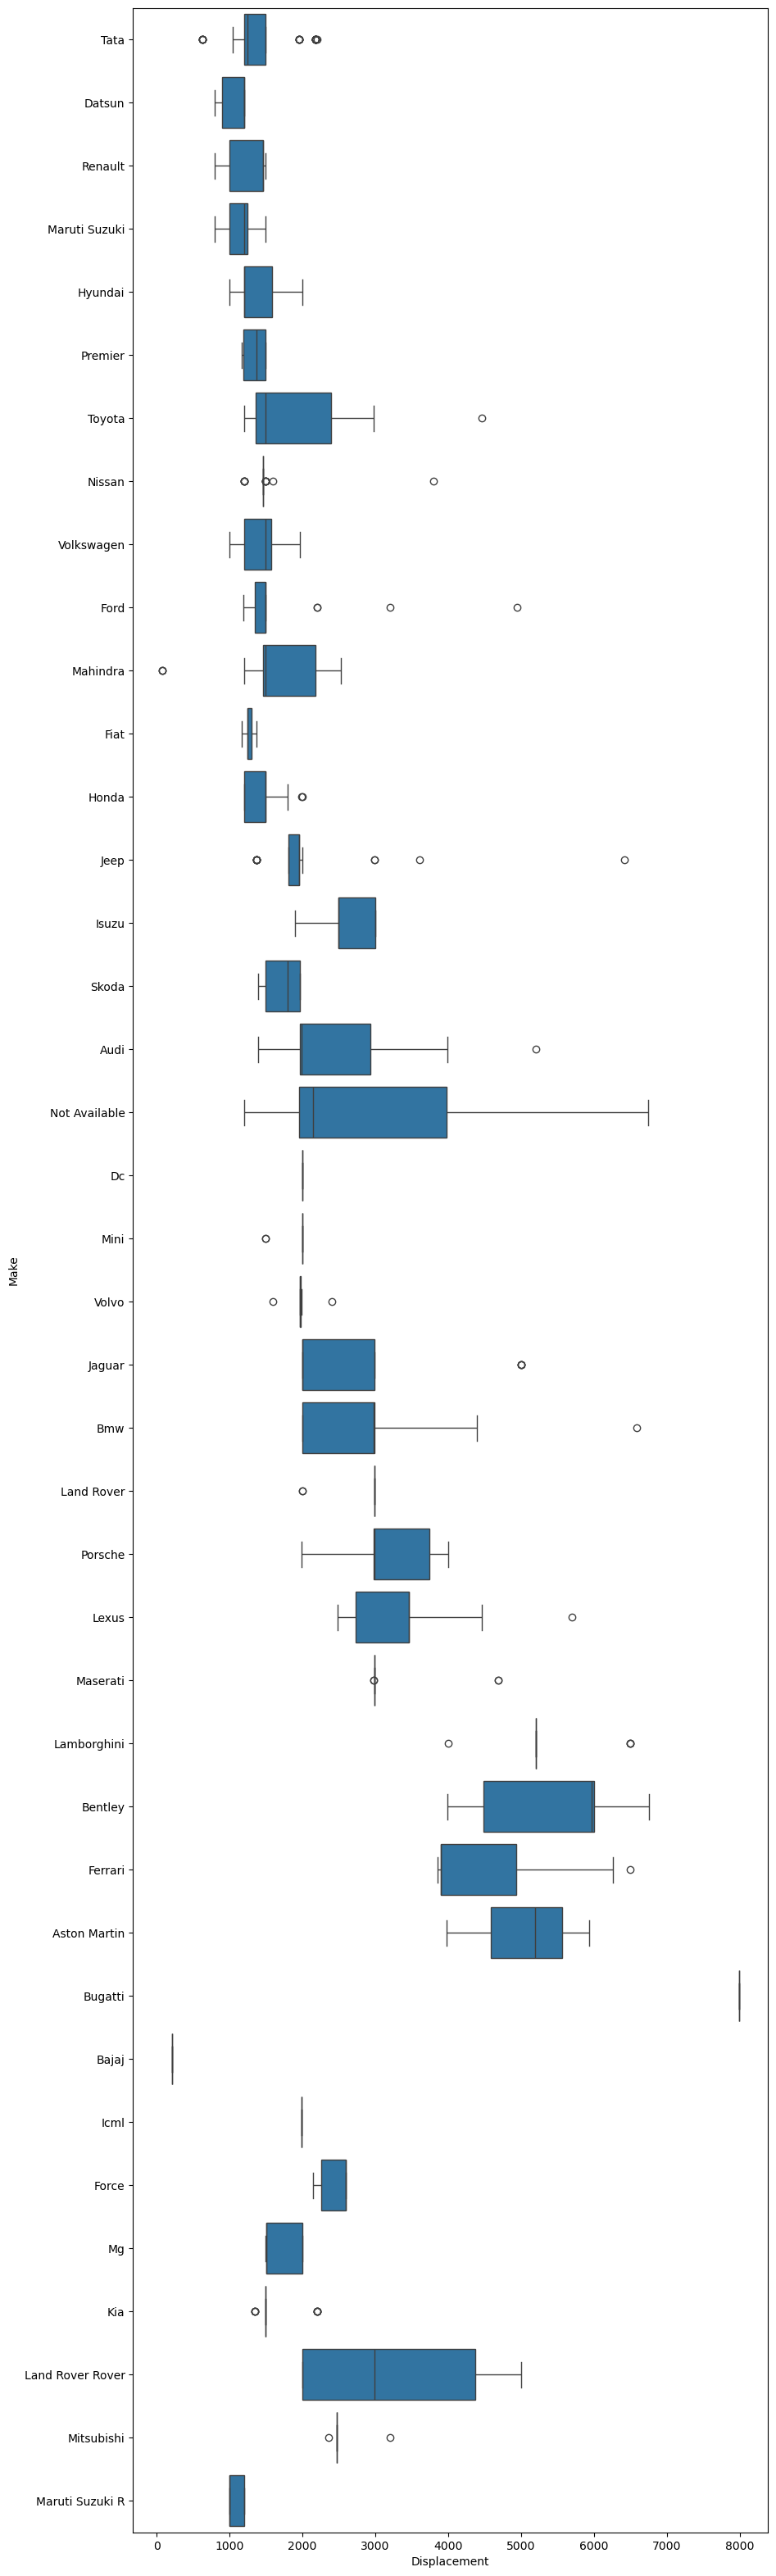

In [118]:
plt.figure(figsize=(10,40))
sns.boxplot(y="Make",x="Displacement",data=SALES)

INTERPRETATION
This analysis examines the Displacement feature across different car makes, using summary statistics (mean, median, standard deviation) and visualizations to understand engine capacity distribution. The pivot table and grouped data provide insights into each brand’s typical engine size and variability, with standard deviation indicating the spread of engine sizes within each brand. Sorting and removing duplicates from Displacement highlights unique engine capacities, while the boxplot visualization shows distribution and outliers. This comprehensive view helps identify brands with higher average displacement, which could imply greater engine power, as well as variability in engine options within each brand.

In [120]:
# Task 13
RENAULT=SALES[SALES.Make=="Renault"]
RENAULT

,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,Length_mm,...,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,Average_Mileage
12,Renault,Kwid,Rxe 0.8,799.0,3.0,4.0,28.0,Petrol,1490.0,3731.0,...,Yes,Not Available,Not Available,Not Available,Yes,3850.0,Driver frontal airbag,Yes,Yes,21.180
13,Renault,Kwid,Std 0.8,799.0,3.0,4.0,28.0,Petrol,1490.0,3731.0,...,Not Available,Not Available,Not Available,Not Available,Yes,3850.0,Driver frontal airbag,Not Available,Yes,21.180
14,Renault,Kwid,Rxl 0.8,799.0,3.0,4.0,28.0,Petrol,1490.0,3731.0,...,Yes,Not Available,Not Available,Not Available,Yes,3850.0,Driver frontal airbag,Yes,Yes,21.180
15,Renault,Kwid,Rxt 0.8,799.0,3.0,4.0,28.0,Petrol,1490.0,3731.0,...,Yes,Not Available,Not Available,Not Available,Yes,3850.0,Driver frontal airbag,Yes,Yes,21.180
16,Renault,Kwid,Rxt 1.0,999.0,3.0,4.0,28.0,Petrol,1490.0,3731.0,...,Yes,Not Available,Not Available,Not Available,Yes,3850.0,Driver frontal airbag,Yes,Yes,21.180
17,Renault,Kwid,Climber 1.0 Mt,999.0,3.0,4.0,28.0,Petrol,1490.0,3731.0,...,Yes,Not Available,Not Available,Not Available,Yes,3850.0,Driver frontal airbag,Yes,Yes,21.180
18,Renault,Kwid,Rxt Amt 1.0,999.0,3.0,4.0,28.0,Petrol,1490.0,3731.0,...,Yes,Not Available,Not Available,Not Available,Yes,3850.0,Driver frontal airbag,Yes,Yes,21.180
19,Renault,Kwid,Climber Amt 1.0,999.0,3.0,4.0,28.0,Petrol,1490.0,3731.0,...,Yes,Not Available,Not Available,Not Available,Yes,3850.0,Driver frontal airbag,Yes,Yes,21.180
20,Renault,Kwid,Rxt (O) 1.0,999.0,3.0,4.0,28.0,Petrol,1490.0,3731.0,...,Yes,Not Available,Not Available,Not Available,Yes,3850.0,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,21.180
21,Renault,Kwid,Rxt (O) Amt 1.0,999.0,3.0,4.0,28.0,Petrol,1490.0,3731.0,...,Yes,Not Available,Not Available,Not Available,Yes,3850.0,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,21.180


In [121]:
TOYATO=SALES[SALES.Make=="Toyota"]
TOYATO

,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,Length_mm,...,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,Average_Mileage
87,Toyota,Etios Liva,G,1197.0,4.0,4.0,45.0,Petrol,1510.0,3884.0,...,Yes,Not Available,Not Available,Not Available,Yes,3245.0,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,16.405
88,Toyota,Etios Liva,V,1197.0,4.0,4.0,45.0,Petrol,1510.0,3884.0,...,Yes,Not Available,Not Available,Not Available,Yes,3245.0,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,16.630
89,Toyota,Etios Liva,Gd,1364.0,4.0,2.0,45.0,Diesel,1510.0,3884.0,...,Yes,Not Available,Not Available,Not Available,Yes,3245.0,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,21.945
90,Toyota,Etios Liva,Vx,1197.0,4.0,4.0,45.0,Petrol,1510.0,3884.0,...,Yes,Not Available,Not Available,Not Available,Yes,3245.0,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,16.405
91,Toyota,Etios Liva,Vxd,1364.0,4.0,2.0,45.0,Diesel,1510.0,3884.0,...,Yes,Not Available,Not Available,Not Available,Yes,3245.0,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,21.690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,Toyota,Yaris,J (O),1496.0,4.0,4.0,42.0,Petrol,1495.0,4425.0,...,Yes,Not Available,Normal,Yes,Yes,3476.0,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,16.240
1235,Toyota,Yaris,G (O),1496.0,4.0,4.0,42.0,Petrol,1495.0,4425.0,...,Yes,Not Available,Not Available,Yes,Yes,3476.0,"Driver frontal airbag, Front passenger side ai...",Yes,Yes,16.240
1236,Toyota,Yaris,J (O) Cvt,1496.0,4.0,4.0,42.0,Petrol,1495.0,4425.0,...,Yes,Not Available,Normal,Yes,Yes,3476.0,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,16.240
1237,Toyota,Yaris,G (O) Cvt,1496.0,4.0,4.0,42.0,Petrol,1495.0,4425.0,...,Yes,Not Available,Not Available,Yes,Yes,3476.0,"Driver frontal airbag, Front passenger side ai...",Yes,Yes,16.240


In [122]:
HONDA=SALES[SALES.Make=="Honda"]
HONDA

,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,Length_mm,...,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,Average_Mileage
227,Honda,Jazz,V Petrol,1199.0,4.0,4.0,40.0,Petrol,1544.0,3955.0,...,Yes,Not Available,Not Available,Not Available,Yes,3850.0,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,14.245
228,Honda,Jazz,Vx Cvt,1199.0,4.0,4.0,40.0,Petrol,1544.0,3955.0,...,Yes,Not Available,Not Available,Not Available,Yes,3850.0,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,14.245
229,Honda,Jazz,Vx Petrol,1199.0,4.0,4.0,40.0,Petrol,1544.0,3955.0,...,Yes,Not Available,Not Available,Not Available,Yes,3850.0,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,14.245
230,Honda,Jazz,V Cvt,1199.0,4.0,4.0,40.0,Petrol,1544.0,3955.0,...,Yes,Not Available,Not Available,Not Available,Yes,3850.0,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,14.245
231,Honda,Jazz,S Diesel,1498.0,4.0,4.0,40.0,Diesel,1544.0,3955.0,...,Yes,Not Available,Not Available,Not Available,Yes,3850.0,"Driver frontal airbag, Front passenger frontal...",Yes,Not Available,14.595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Honda,City,V Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,4440.0,...,Yes,Not Available,Not Available,Yes,Yes,3350.6,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,24.100
1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,4440.0,...,Yes,Not Available,Not Available,Yes,Yes,3399.0,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,23.850
1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,4440.0,...,Yes,Not Available,Not Available,Yes,Yes,3410.0,"Drive side airbag, Curtain airbags, Driver fro...",Yes,Yes,23.850
1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,4440.0,...,Yes,Not Available,Not Available,Yes,Yes,3260.4,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes,18.000


In [123]:
RENAULT_SEP=RENAULT.loc[:,["Displacement","Power","Torque","Average_Mileage"]]
RENAULT_SEP

,Displacement,Power,Torque,Average_Mileage
12,799.0,54.0,72.0,21.180
13,799.0,54.0,72.0,21.180
14,799.0,54.0,72.0,21.180
15,799.0,54.0,72.0,21.180
16,999.0,68.0,91.0,21.180
17,999.0,68.0,91.0,21.180
18,999.0,68.0,91.0,21.180
19,999.0,68.0,91.0,21.180
20,999.0,68.0,91.0,21.180
21,999.0,68.0,91.0,21.180


In [124]:
RENAULT_CORR = RENAULT_SEP.corr()
RENAULT_CORR

,Displacement,Power,Torque,Average_Mileage
Displacement,1.000000,0.907051,0.863249,-0.580795
Power,0.907051,1.000000,0.832148,-0.648812
Torque,0.863249,0.832148,1.000000,-0.299752
Average_Mileage,-0.580795,-0.648812,-0.299752,1.000000


In [125]:
TOYATO_SEP=TOYATO.loc[:,["Displacement","Power","Torque","Average_Mileage"]]
TOYATO_SEP

,Displacement,Power,Torque,Average_Mileage
87,1197.0,80.0,104.0,16.405
88,1197.0,80.0,104.0,16.630
89,1364.0,68.0,170.0,21.945
90,1197.0,80.0,104.0,16.405
91,1364.0,68.0,170.0,21.690
...,...,...,...,...
1234,1496.0,107.0,140.0,16.240
1235,1496.0,107.0,140.0,16.240
1236,1496.0,107.0,140.0,16.240
1237,1496.0,107.0,140.0,16.240


In [126]:
TOYATO_CORR=TOYATO_SEP.corr()
TOYATO_CORR

,Displacement,Power,Torque,Average_Mileage
Displacement,1.000000,0.956218,0.915263,-0.713264
Power,0.956218,1.000000,0.835299,-0.818057
Torque,0.915263,0.835299,1.000000,-0.529686
Average_Mileage,-0.713264,-0.818057,-0.529686,1.000000


In [127]:
HONDA_SEP=HONDA.loc[:,["Power","Torque","Displacement","Average_Mileage"]]
HONDA_SEP

,Power,Torque,Displacement,Average_Mileage
227,90.0,110.0,1199.0,14.245
228,90.0,110.0,1199.0,14.245
229,90.0,110.0,1199.0,14.245
230,90.0,110.0,1199.0,14.245
231,100.0,200.0,1498.0,14.595
...,...,...,...,...
1270,100.0,200.0,1498.0,24.100
1271,100.0,200.0,1498.0,23.850
1272,100.0,200.0,1498.0,23.850
1273,119.0,145.0,1497.0,18.000


In [128]:
HONDA_CORR=HONDA_SEP.corr()
HONDA_CORR

,Power,Torque,Displacement,Average_Mileage
Power,1.000000,0.371133,0.833711,-0.072206
Torque,0.371133,1.000000,0.645744,0.295702
Displacement,0.833711,0.645744,1.000000,0.196671
Average_Mileage,-0.072206,0.295702,0.196671,1.000000


                 Displacement     Power    Torque  Average_Mileage
Displacement         1.000000  0.956218  0.915263        -0.713264
Power                0.956218  1.000000  0.835299        -0.818057
Torque               0.915263  0.835299  1.000000        -0.529686
Average_Mileage     -0.713264 -0.818057 -0.529686         1.000000
---------------------------------------------------


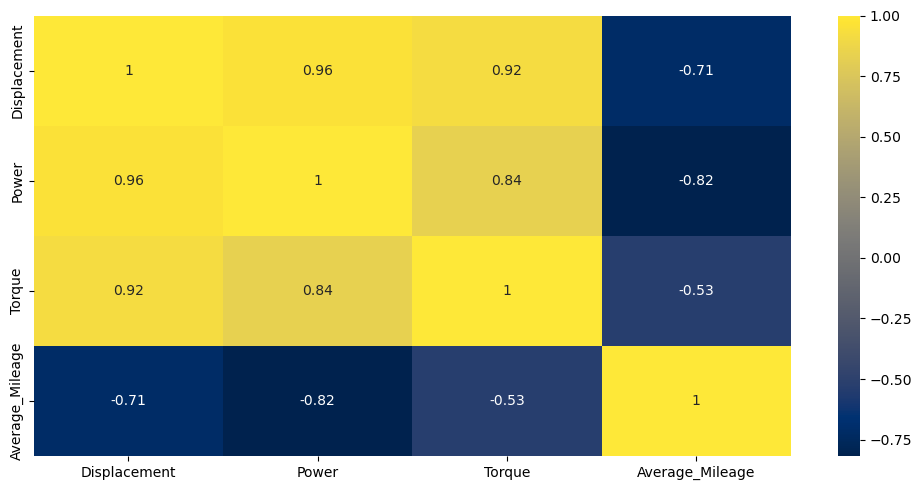

In [129]:
f=TOYATO[(TOYATO['Make']=='Toyota')|(RENAULT['Make']=='Renault')|(HONDA['Make']=='Honda')]
f

cor=f[['Displacement','Power','Torque','Average_Mileage']].corr()
print(cor)
print("---------------------------------------------------")
plt.figure(figsize=(10,5))
sns.heatmap(cor,annot=True,cmap='cividis')
plt.tight_layout()
plt.show()

INTERPRETATION
This analysis investigates the correlations among key performance metrics—Displacement, Power, Torque, and Average Mileage—for Renault, Toyota, and Honda vehicles. The correlation matrices reveal the relationships between these metrics for each brand, showing how attributes like engine displacement correlate with power output and mileage. For example, a high positive correlation between displacement and power indicates that larger engines typically produce more power. Negative correlations between displacement or power and average mileage suggest that higher power and displacement may reduce fuel efficiency. The combined heatmap visually highlights these relationships, aiding in comparative analysis of performance trade-offs across brands.

In [131]:
weights=SALES.loc[:,["Make","Model","Kerb_Weight","Gross_Vehicle_Weight"]]
weights

,Make,Model,Kerb_Weight,Gross_Vehicle_Weight
0,Tata,Nano Genx,1452.0,3850.0
1,Tata,Nano Genx,1595.0,3850.0
2,Tata,Nano Genx,1562.0,3850.0
3,Tata,Nano Genx,1595.0,3850.0
4,Tata,Nano Genx,1595.0,3850.0
...,...,...,...,...
1271,Honda,City,2574.0,3399.0
1272,Honda,City,2585.0,3410.0
1273,Honda,City,2435.4,3260.4
1274,Honda,City,2376.0,3201.0


In [132]:
Mean_weights=weights.groupby(by="Make")[["Kerb_Weight","Gross_Vehicle_Weight"]].mean()
Mean_weights

,Kerb_Weight,Gross_Vehicle_Weight
Make,,
Aston Martin,3813.333333,4092.733333
Audi,3982.000000,5002.161290
Bajaj,2712.600000,3850.000000
Bentley,5407.233333,6744.466667
Bmw,3315.756757,4454.108108
Bugatti,4389.000000,3850.000000
Datsun,2225.520000,3850.000000
Dc,3476.000000,3476.000000
Ferrari,3594.250000,3850.000000


In [133]:
Median_weights=weights.groupby(by="Make")[['Kerb_Weight','Gross_Vehicle_Weight']].median()
Median_weights

,Kerb_Weight,Gross_Vehicle_Weight
Make,,
Aston Martin,3696.0,3850.0
Audi,3916.0,4807.0
Bajaj,2712.6,3850.0
Bentley,5335.0,6789.2
Bmw,3498.0,3850.0
Bugatti,4389.0,3850.0
Datsun,1900.8,3850.0
Dc,3476.0,3476.0
Ferrari,3470.5,3850.0


In [134]:
sd_weights=weights.groupby(by="Make")[["Kerb_Weight","Gross_Vehicle_Weight"]].std()
sd_weights

,Kerb_Weight,Gross_Vehicle_Weight
Make,,
Aston Martin,516.102057,420.426466
Audi,753.233651,870.553314
Bajaj,0.000000,0.000000
Bentley,268.974331,443.500939
Bmw,565.980023,769.888151
Bugatti,0.000000,0.000000
Datsun,411.657734,0.000000
Dc,NaN,NaN
Ferrari,449.627703,0.000000


In [135]:
cv=(Mean_weights/sd_weights)*100
cv

,Kerb_Weight,Gross_Vehicle_Weight
Make,,
Aston Martin,7.388720e+02,9.734719e+02
Audi,5.286540e+02,5.745956e+02
Bajaj,inf,inf
Bentley,2.010316e+03,1.520733e+03
Bmw,5.858434e+02,5.785396e+02
Bugatti,inf,inf
Datsun,5.406239e+02,inf
Dc,NaN,NaN
Ferrari,7.993836e+02,inf


In [136]:
performance = pd.concat([Mean_weights, Median_weights, sd_weights, cv], axis=1)
performance.columns = [
    "Mean_Kerb_Weight", "Mean_Gross_Vehicle_Weight",
    "Median_Kerb_Weight", "Median_Gross_Vehicle_Weight",
    "StdDev_Kerb_Weight", "StdDev_Gross_Vehicle_Weight",
    "CV_Kerb_Weight", "CV_Gross_Vehicle_Weight"
]
performance


,Mean_Kerb_Weight,Mean_Gross_Vehicle_Weight,Median_Kerb_Weight,Median_Gross_Vehicle_Weight,StdDev_Kerb_Weight,StdDev_Gross_Vehicle_Weight,CV_Kerb_Weight,CV_Gross_Vehicle_Weight
Make,,,,,,,,
Aston Martin,3813.333333,4092.733333,3696.0,3850.0,516.102057,420.426466,7.388720e+02,9.734719e+02
Audi,3982.000000,5002.161290,3916.0,4807.0,753.233651,870.553314,5.286540e+02,5.745956e+02
Bajaj,2712.600000,3850.000000,2712.6,3850.0,0.000000,0.000000,inf,inf
Bentley,5407.233333,6744.466667,5335.0,6789.2,268.974331,443.500939,2.010316e+03,1.520733e+03
Bmw,3315.756757,4454.108108,3498.0,3850.0,565.980023,769.888151,5.858434e+02,5.785396e+02
Bugatti,4389.000000,3850.000000,4389.0,3850.0,0.000000,0.000000,inf,inf
Datsun,2225.520000,3850.000000,1900.8,3850.0,411.657734,0.000000,5.406239e+02,inf
Dc,3476.000000,3476.000000,3476.0,3476.0,NaN,NaN,NaN,NaN
Ferrari,3594.250000,3850.000000,3470.5,3850.0,449.627703,0.000000,7.993836e+02,inf


INTERPRETATION

This analysis calculates key statistical measures (mean, median, standard deviation, and coefficient of variation) for Kerb_Weight and Gross_Vehicle_Weight across different car brands. The mean and median provide central tendency values, while the standard deviation measures variability. The coefficient of variation (CV) is calculated to assess relative variability, helping identify brands with more consistent or more variable weight distributions. The resulting performance table offers insights into how each brand manages vehicle weight, which can influence factors like fuel efficiency and handling. This allows for comparative analysis of weight-related characteristics across brands.

In [138]:
# project 2
# Task 1
Safety=SALES.loc[:,["Make",'Model','ABS_(Anti-lock_Braking_System)','Airbags','Hill_Assist']]
Safety

,Make,Model,ABS_(Anti-lock_Braking_System),Airbags,Hill_Assist
0,Tata,Nano Genx,Not Available,Not Available,Not Available
1,Tata,Nano Genx,Not Available,Not Available,Not Available
2,Tata,Nano Genx,Not Available,Not Available,Yes
3,Tata,Nano Genx,Not Available,Not Available,Not Available
4,Tata,Nano Genx,Not Available,Not Available,Not Available
...,...,...,...,...,...
1271,Honda,City,Yes,"Driver frontal airbag, Front passenger frontal...",Not Available
1272,Honda,City,Yes,"Drive side airbag, Curtain airbags, Driver fro...",Not Available
1273,Honda,City,Yes,"Curtain airbags, Driver frontal airbag, Front ...",Not Available
1274,Honda,City,Yes,"Driver frontal airbag, Front passenger frontal...",Not Available


In [139]:
ABS_SEPERATE=Safety.loc[:,["Make","Model","ABS_(Anti-lock_Braking_System)"]]
ABS_SEPERATE

,Make,Model,ABS_(Anti-lock_Braking_System)
0,Tata,Nano Genx,Not Available
1,Tata,Nano Genx,Not Available
2,Tata,Nano Genx,Not Available
3,Tata,Nano Genx,Not Available
4,Tata,Nano Genx,Not Available
...,...,...,...
1271,Honda,City,Yes
1272,Honda,City,Yes
1273,Honda,City,Yes
1274,Honda,City,Yes


In [140]:
ABS_YES=ABS_SEPERATE[ABS_SEPERATE["ABS_(Anti-lock_Braking_System)"]=="Yes"]
ABS_YES

,Make,Model,ABS_(Anti-lock_Braking_System)
6,Datsun,Redi-Go,Yes
12,Renault,Kwid,Yes
13,Renault,Kwid,Yes
14,Renault,Kwid,Yes
15,Renault,Kwid,Yes
...,...,...,...
1271,Honda,City,Yes
1272,Honda,City,Yes
1273,Honda,City,Yes
1274,Honda,City,Yes


In [141]:
airbags=Safety[Safety["Airbags"]!="Not_Available"]
airbags

,Make,Model,ABS_(Anti-lock_Braking_System),Airbags,Hill_Assist
0,Tata,Nano Genx,Not Available,Not Available,Not Available
1,Tata,Nano Genx,Not Available,Not Available,Not Available
2,Tata,Nano Genx,Not Available,Not Available,Yes
3,Tata,Nano Genx,Not Available,Not Available,Not Available
4,Tata,Nano Genx,Not Available,Not Available,Not Available
...,...,...,...,...,...
1271,Honda,City,Yes,"Driver frontal airbag, Front passenger frontal...",Not Available
1272,Honda,City,Yes,"Drive side airbag, Curtain airbags, Driver fro...",Not Available
1273,Honda,City,Yes,"Curtain airbags, Driver frontal airbag, Front ...",Not Available
1274,Honda,City,Yes,"Driver frontal airbag, Front passenger frontal...",Not Available


In [142]:
AIRBAGS_YES=airbags.loc[:,["Make","Model","Airbags"]]
AIRBAGS_YES

,Make,Model,Airbags
0,Tata,Nano Genx,Not Available
1,Tata,Nano Genx,Not Available
2,Tata,Nano Genx,Not Available
3,Tata,Nano Genx,Not Available
4,Tata,Nano Genx,Not Available
...,...,...,...
1271,Honda,City,"Driver frontal airbag, Front passenger frontal..."
1272,Honda,City,"Drive side airbag, Curtain airbags, Driver fro..."
1273,Honda,City,"Curtain airbags, Driver frontal airbag, Front ..."
1274,Honda,City,"Driver frontal airbag, Front passenger frontal..."


In [143]:
Hill_assist=Safety[Safety.Hill_Assist=="Yes"]
Hill_assist

,Make,Model,ABS_(Anti-lock_Braking_System),Airbags,Hill_Assist
2,Tata,Nano Genx,Not Available,Not Available,Yes
151,Volkswagen,Polo,Yes,"Driver frontal airbag, Front passenger frontal...",Yes
168,Ford,Freestyle,Yes,"Driver frontal airbag, Front passenger frontal...",Yes
169,Ford,Freestyle,Yes,"Driver frontal airbag, Front passenger frontal...",Yes
171,Ford,Freestyle,Yes,"Front passenger frontal airbag, Driver frontal...",Yes
...,...,...,...,...,...
1253,Porsche,Cayenne Coupe,Yes,"Driver pelvic airbag, Driver curtain airbag, R...",Yes
1254,Porsche,Cayenne Coupe,Yes,"Driver curtain airbag, Rear passenger curtain ...",Yes
1263,Bentley,Flying Spur,Yes,"Driver frontal airbag, Front passenger frontal...",Yes
1264,Bentley,Flying Spur,Yes,"Front passenger frontal airbag, Front passenge...",Yes


In [144]:
HILL_ASSSIST_YES=Hill_assist.loc[:,["Make","Model","Hill_Assist"]]
HILL_ASSSIST_YES

,Make,Model,Hill_Assist
2,Tata,Nano Genx,Yes
151,Volkswagen,Polo,Yes
168,Ford,Freestyle,Yes
169,Ford,Freestyle,Yes
171,Ford,Freestyle,Yes
...,...,...,...
1253,Porsche,Cayenne Coupe,Yes
1254,Porsche,Cayenne Coupe,Yes
1263,Bentley,Flying Spur,Yes
1264,Bentley,Flying Spur,Yes


INTERPRETATION
This subset of the SALES dataset focuses on safety features across different car makes and models, specifically ABS (Anti-lock Braking System), airbags, and Hill Assist. By examining these features, we gain insights into the safety technologies provided by various brands, which are crucial for consumer decision-making. The presence or absence of these features can indicate a brand's emphasis on safety, with more advanced systems contributing to enhanced vehicle protection. This analysis allows for a comparative view of safety options across different makes and models, helping consumers evaluate safety features when choosing a car.

In [146]:
# Task 2
seat=SALES.loc[:,["Model","Seating_Capacity"]]
seat

,Model,Seating_Capacity
0,Nano Genx,4.0
1,Nano Genx,4.0
2,Nano Genx,4.0
3,Nano Genx,4.0
4,Nano Genx,4.0
...,...,...
1271,City,5.0
1272,City,5.0
1273,City,5.0
1274,City,5.0


In [147]:
seat_average=seat.groupby(by="Model")[["Seating_Capacity"]].mean()
seat_average

,Seating_Capacity
Model,
718,2.0
911,4.0
3-Series,5.0
458 Speciale,2.0
458 Spider,2.0
...,...
Xylo,7.2
Yaris,5.0
Z4 Roadster,2.0


In [148]:
central=SALES.loc[:,["Make","Model","Central_Locking"]]
central

,Make,Model,Central_Locking
0,Tata,Nano Genx,Yes
1,Tata,Nano Genx,Not Available
2,Tata,Nano Genx,Not Available
3,Tata,Nano Genx,Yes
4,Tata,Nano Genx,Not Available
...,...,...,...
1271,Honda,City,Yes
1272,Honda,City,Yes
1273,Honda,City,Yes
1274,Honda,City,Yes


In [149]:
sep_central_locking=central[central.Central_Locking=="Yes"]
sep_central_locking

,Make,Model,Central_Locking
0,Tata,Nano Genx,Yes
3,Tata,Nano Genx,Yes
7,Datsun,Redi-Go,Yes
11,Datsun,Redi-Go,Yes
14,Renault,Kwid,Yes
...,...,...,...
1271,Honda,City,Yes
1272,Honda,City,Yes
1273,Honda,City,Yes
1274,Honda,City,Yes


In [150]:
sep_make=sep_central_locking.loc[:,["Model","Central_Locking"]]
sep_make

,Model,Central_Locking
0,Nano Genx,Yes
3,Nano Genx,Yes
7,Redi-Go,Yes
11,Redi-Go,Yes
14,Kwid,Yes
...,...,...
1271,City,Yes
1272,City,Yes
1273,City,Yes
1274,City,Yes


In [151]:
count_central_locking=sep_make.groupby(by="Model")[["Central_Locking"]].count()
count_central_locking

,Central_Locking
Model,
718,2
911,2
3-Series,3
458 Speciale,1
458 Spider,1
...,...
Xylo,3
Yaris,14
Z4 Roadster,2


In [152]:
child=SALES.loc[:,["Make","Model","Child_Safety_Locks"]]
child

,Make,Model,Child_Safety_Locks
0,Tata,Nano Genx,Yes
1,Tata,Nano Genx,Yes
2,Tata,Nano Genx,Yes
3,Tata,Nano Genx,Yes
4,Tata,Nano Genx,Yes
...,...,...,...
1271,Honda,City,Yes
1272,Honda,City,Yes
1273,Honda,City,Yes
1274,Honda,City,Yes


In [153]:
SEP_MAKE_child=child[child.Child_Safety_Locks=="Yes"]
SEP_MAKE_child

,Make,Model,Child_Safety_Locks
0,Tata,Nano Genx,Yes
1,Tata,Nano Genx,Yes
2,Tata,Nano Genx,Yes
3,Tata,Nano Genx,Yes
4,Tata,Nano Genx,Yes
...,...,...,...
1271,Honda,City,Yes
1272,Honda,City,Yes
1273,Honda,City,Yes
1274,Honda,City,Yes


In [154]:
child_sep=SEP_MAKE_child.loc[:,["Model","Child_Safety_Locks"]]
child_sep

,Model,Child_Safety_Locks
0,Nano Genx,Yes
1,Nano Genx,Yes
2,Nano Genx,Yes
3,Nano Genx,Yes
4,Nano Genx,Yes
...,...,...
1271,City,Yes
1272,City,Yes
1273,City,Yes
1274,City,Yes


In [155]:
count_child_safety=child_sep.groupby(by="Model")[["Child_Safety_Locks"]].count()
count_child_safety

,Child_Safety_Locks
Model,
718,2
911,2
3-Series,3
458 Speciale,1
5-Series,2
...,...
Xylo,5
Yaris,14
Z4 Roadster,2


INTERPRETATION
This analysis focuses on key safety and comfort features across different car models. The seating capacity is grouped by model to identify average values, showing how car brands offer varied seating configurations. The data also highlights models with central locking and child safety locks, with counts showing the prevalence of these safety features across different makes and models. By comparing the availability of central locking and child safety locks, this analysis offers insights into the focus on security and family-friendly features within various car brands, helping consumers choose vehicles based on these safety aspects

In [157]:
# Task 3
find=SALES.loc[:,["Make","Model","High_Speed_Alert_System","Fasten_Seat_Belt_Warning","Door_Ajar_Warning"]]
find

,Make,Model,High_Speed_Alert_System,Fasten_Seat_Belt_Warning,Door_Ajar_Warning
0,Tata,Nano Genx,Not Available,Not Available,Not Available
1,Tata,Nano Genx,Not Available,Not Available,Not Available
2,Tata,Nano Genx,Not Available,Not Available,Not Available
3,Tata,Nano Genx,Not Available,Not Available,Not Available
4,Tata,Nano Genx,Not Available,Not Available,Not Available
...,...,...,...,...,...
1271,Honda,City,Yes,Yes,Yes
1272,Honda,City,Yes,Yes,Yes
1273,Honda,City,Yes,Yes,Yes
1274,Honda,City,Yes,Yes,Yes


In [158]:
High_speed_alert=find[find.High_Speed_Alert_System=="Yes"]
High_speed_alert

,Make,Model,High_Speed_Alert_System,Fasten_Seat_Belt_Warning,Door_Ajar_Warning
24,Maruti Suzuki,Eeco,Yes,Not Available,Not Available
25,Maruti Suzuki,Eeco,Yes,Not Available,Not Available
27,Maruti Suzuki,Eeco,Yes,Not Available,Not Available
28,Maruti Suzuki,Eeco,Yes,Not Available,Not Available
59,Tata,Tiago,Yes,Yes,Yes
...,...,...,...,...,...
1270,Honda,City,Yes,Yes,Yes
1271,Honda,City,Yes,Yes,Yes
1272,Honda,City,Yes,Yes,Yes
1273,Honda,City,Yes,Yes,Yes


In [159]:
High_speed_alert_sep=High_speed_alert.loc[:,["Make","Model","High_Speed_Alert_System"]]
High_speed_alert_sep

,Make,Model,High_Speed_Alert_System
24,Maruti Suzuki,Eeco,Yes
25,Maruti Suzuki,Eeco,Yes
27,Maruti Suzuki,Eeco,Yes
28,Maruti Suzuki,Eeco,Yes
59,Tata,Tiago,Yes
...,...,...,...
1270,Honda,City,Yes
1271,Honda,City,Yes
1272,Honda,City,Yes
1273,Honda,City,Yes


In [160]:
seat_belt_warning=find[find.Fasten_Seat_Belt_Warning=="Yes"]
seat_belt_warning

,Make,Model,High_Speed_Alert_System,Fasten_Seat_Belt_Warning,Door_Ajar_Warning
12,Renault,Kwid,Not Available,Yes,Yes
13,Renault,Kwid,Not Available,Yes,Not Available
14,Renault,Kwid,Not Available,Yes,Yes
15,Renault,Kwid,Not Available,Yes,Yes
16,Renault,Kwid,Not Available,Yes,Yes
...,...,...,...,...,...
1271,Honda,City,Yes,Yes,Yes
1272,Honda,City,Yes,Yes,Yes
1273,Honda,City,Yes,Yes,Yes
1274,Honda,City,Yes,Yes,Yes


In [161]:
seat_belt_warning_sep=seat_belt_warning.loc[:,["Make","Fasten_Seat_Belt_Warning"]]
seat_belt_warning_sep

,Make,Fasten_Seat_Belt_Warning
12,Renault,Yes
13,Renault,Yes
14,Renault,Yes
15,Renault,Yes
16,Renault,Yes
...,...,...
1271,Honda,Yes
1272,Honda,Yes
1273,Honda,Yes
1274,Honda,Yes


In [162]:
door_ajar_warnings=find[find.Door_Ajar_Warning=="Yes"]
door_ajar_warnings

,Make,Model,High_Speed_Alert_System,Fasten_Seat_Belt_Warning,Door_Ajar_Warning
5,Tata,Nano Genx,Not Available,Not Available,Yes
12,Renault,Kwid,Not Available,Yes,Yes
14,Renault,Kwid,Not Available,Yes,Yes
15,Renault,Kwid,Not Available,Yes,Yes
16,Renault,Kwid,Not Available,Yes,Yes
...,...,...,...,...,...
1271,Honda,City,Yes,Yes,Yes
1272,Honda,City,Yes,Yes,Yes
1273,Honda,City,Yes,Yes,Yes
1274,Honda,City,Yes,Yes,Yes


In [163]:
door_ajar_warnings_sep=door_ajar_warnings.loc[:,["Make","Model","Door_Ajar_Warning"]]
door_ajar_warnings_sep

,Make,Model,Door_Ajar_Warning
5,Tata,Nano Genx,Yes
12,Renault,Kwid,Yes
14,Renault,Kwid,Yes
15,Renault,Kwid,Yes
16,Renault,Kwid,Yes
...,...,...,...
1271,Honda,City,Yes
1272,Honda,City,Yes
1273,Honda,City,Yes
1274,Honda,City,Yes


In [164]:
SEPERATE_HLW=SALES.loc[:,["Make","Model","Height_mm","Length_mm","Width_mm"]]
SEPERATE_HLW

,Make,Model,Height_mm,Length_mm,Width_mm
0,Tata,Nano Genx,1652.0,3164.0,1750.0
1,Tata,Nano Genx,1652.0,3164.0,1750.0
2,Tata,Nano Genx,1652.0,3164.0,1750.0
3,Tata,Nano Genx,1652.0,3164.0,1750.0
4,Tata,Nano Genx,1652.0,3164.0,1750.0
...,...,...,...,...,...
1271,Honda,City,1495.0,4440.0,1695.0
1272,Honda,City,1495.0,4440.0,1695.0
1273,Honda,City,1495.0,4440.0,1695.0
1274,Honda,City,1495.0,4440.0,1695.0


INTERPRETATION
This analysis focuses on identifying and isolating car models that feature specific safety alerts, including the High-Speed Alert System, Fasten Seat Belt Warning, and Door Ajar Warning. For each of these systems, the dataset filters and isolates cars that have these features enabled, providing insights into which brands and models prioritize these safety warnings. The separation of these features by make and model helps in understanding the availability and focus on safety systems within each brand, allowing consumers to identify vehicles that come equipped with essential safety notifications for driving

In [166]:
# Task 4
pivot_for_HLW = pd.pivot_table(SEPERATE_HLW, index="Make", values=["Height_mm", "Length_mm", "Width_mm"], aggfunc="mean")
pivot_for_HLW

,Height_mm,Length_mm,Width_mm
Make,,,
Aston Martin,1294.333333,4623.000000,1982.333333
Audi,1543.612903,4715.096774,1875.838710
Bajaj,1652.000000,2752.000000,1312.000000
Bentley,1563.666667,5210.166667,2140.666667
Bmw,1541.486486,4816.891892,1980.243243
Bugatti,1212.000000,4544.000000,2038.000000
Datsun,1520.600000,3644.400000,1605.600000
Dc,1200.000000,4565.000000,2120.000000
Ferrari,1275.250000,4668.125000,1956.000000


INTERPRETATION:
The pivot table pivot_for_HLW aggregates the data by car make, calculating the mean values for key vehicle dimensions—Height, Length, and Width (in millimeters). This provides a summary of the average size for each car make across different models. The resulting table helps compare the typical size of vehicles from different manufacturers, offering insights into which brands tend to produce larger or more compact cars on average. It can be useful for understanding trends in vehicle design and size preferences within the automotive industry.

In [168]:
# P2 TASK 3 ADDITIONAL QUESTION
DF=SALES.loc[:,["Make","Model","High_Speed_Alert_System","Fasten_Seat_Belt_Warning","Door_Ajar_Warning"]]
DF

,Make,Model,High_Speed_Alert_System,Fasten_Seat_Belt_Warning,Door_Ajar_Warning
0,Tata,Nano Genx,Not Available,Not Available,Not Available
1,Tata,Nano Genx,Not Available,Not Available,Not Available
2,Tata,Nano Genx,Not Available,Not Available,Not Available
3,Tata,Nano Genx,Not Available,Not Available,Not Available
4,Tata,Nano Genx,Not Available,Not Available,Not Available
...,...,...,...,...,...
1271,Honda,City,Yes,Yes,Yes
1272,Honda,City,Yes,Yes,Yes
1273,Honda,City,Yes,Yes,Yes
1274,Honda,City,Yes,Yes,Yes


In [169]:
DF["High_Speed_Alert_System"] = DF["High_Speed_Alert_System"].replace({"Yes": 1,"Not Available": 0})

In [170]:
DF['Fasten_Seat_Belt_Warning']=DF['Fasten_Seat_Belt_Warning'].replace({"Yes":1,"Not Available":0})

In [171]:
DF['Door_Ajar_Warning']=DF['Door_Ajar_Warning'].replace({"Yes":1,"Not Available":0})

In [172]:
DF["High_Speed_Alert_System"] 

0       0
1       0
2       0
3       0
4       0
       ..
1271    1
1272    1
1273    1
1274    1
1275    0
Name: High_Speed_Alert_System, Length: 1264, dtype: int64

In [173]:
DF

,Make,Model,High_Speed_Alert_System,Fasten_Seat_Belt_Warning,Door_Ajar_Warning
0,Tata,Nano Genx,0,0,0
1,Tata,Nano Genx,0,0,0
2,Tata,Nano Genx,0,0,0
3,Tata,Nano Genx,0,0,0
4,Tata,Nano Genx,0,0,0
...,...,...,...,...,...
1271,Honda,City,1,1,1
1272,Honda,City,1,1,1
1273,Honda,City,1,1,1
1274,Honda,City,1,1,1


In [174]:
DF.insert(5,"Total_count",DF["High_Speed_Alert_System"]+DF["Fasten_Seat_Belt_Warning"]+DF["Door_Ajar_Warning"])

In [175]:
DF

,Make,Model,High_Speed_Alert_System,Fasten_Seat_Belt_Warning,Door_Ajar_Warning,Total_count
0,Tata,Nano Genx,0,0,0,0
1,Tata,Nano Genx,0,0,0,0
2,Tata,Nano Genx,0,0,0,0
3,Tata,Nano Genx,0,0,0,0
4,Tata,Nano Genx,0,0,0,0
...,...,...,...,...,...,...
1271,Honda,City,1,1,1,3
1272,Honda,City,1,1,1,3
1273,Honda,City,1,1,1,3
1274,Honda,City,1,1,1,3


OVERALL SUMMARY
This comprehensive analysis covers multiple aspects of car performance, safety, and design. It compares brands on factors like fuel efficiency, engine displacement, power, torque, and weight, helping identify trade-offs between performance and mileage. The safety feature analysis highlights how various brands prioritize essential systems like airbags, central locking, and high-speed alerts. Additionally, vehicle dimensions are analyzed to understand size trends across manufacturers. Statistical measures like mean, median, and standard deviation provide insights into data consistency, while skewness and correlation analysis help identify trends in mileage and power. Overall, this data-driven approach supports informed consumer decisions.